In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

MODE = 'verif'

In [168]:
df_train = pd.read_csv('/data/rvasilye/DMIA Sport/train.csv')
df_test = pd.read_csv('/data/rvasilye/DMIA Sport/Xtest.csv') 

df_train.head()

,Password,Times
0,631XniVx2lS5I,2
1,LEGIT747,1
2,742364es,1
3,3846696477,1
4,laurahop,2


In [169]:
if MODE == 'verif':
    X_train, X_test, y_train, y_test = train_test_split(df_train[['Password']] , df_train[['Times']], test_size=0.3, random_state=42)
else:
    X_train, y_train = df_train[['Password']] , df_train[['Times']]
    X_test = df_test

In [170]:
del df_train
del df_test

In [171]:
def only_num(x):
    try:
        int(x)
        return True
    except:
        return False

In [172]:
X_train['only_num'] = X_train['Password'].apply(lambda x: int(only_num(x)))
X_test['only_num'] = X_test['Password'].apply(lambda x: int(only_num(x)))

In [173]:
def in_123(x):
    return ('123' in str(x))

In [174]:
X_train['in_123'] = X_train['Password'].apply(lambda x: int(in_123(x)))
X_test['in_123'] = X_test['Password'].apply(lambda x: int(in_123(x)))

In [175]:
def up_reg(x):
    return (str(x).upper() == str(x))

In [176]:
X_train['up_reg'] = X_train['Password'].apply(lambda x: int(up_reg(x)))
X_test['up_reg'] = X_test['Password'].apply(lambda x: int(up_reg(x)))

In [177]:
def low_reg(x):
    return (str(x).lower() == str(x))

In [178]:
X_train['low_reg'] = X_train['Password'].apply(lambda x: int(low_reg(x)))
X_test['low_reg'] = X_test['Password'].apply(lambda x: int(low_reg(x)))

In [179]:
def only_bukv(x):
    return (str(x).isalpha())

In [180]:
X_train['only_bukv'] = X_train['Password'].apply(lambda x: int(only_bukv(x)))
X_test['only_bukv'] = X_test['Password'].apply(lambda x: int(only_bukv(x)))

In [181]:
def uniq_symb(x):
    return len(set(str(x)))

In [182]:
X_train['uniq_symb'] = X_train['Password'].apply(lambda x: int(uniq_symb(x)))
X_test['uniq_symb'] = X_test['Password'].apply(lambda x: int(uniq_symb(x)))

In [183]:
def uniq_symb_len(x):
    return len(set(str(x)))/len(str(x))

In [184]:
X_train['uniq_symb_len'] = X_train['Password'].apply(lambda x: (uniq_symb_len(x)))
X_test['uniq_symb_len'] = X_test['Password'].apply(lambda x: (uniq_symb_len(x)))

In [185]:
X_train['len'] = X_train['Password'].apply(lambda x: (len(str(x))))
X_test['len'] = X_test['Password'].apply(lambda x: (len(str(x))))

In [186]:
def nums_posl(x):
    if str(x) in '0123456789':
        return True
    else:
        return False

In [187]:
X_train['nums_posl'] = X_train['Password'].apply(lambda x: int(nums_posl(x)))
X_test['nums_posl'] = X_test['Password'].apply(lambda x: int(nums_posl(x)))

In [188]:
def bukv_posl_min(x):
    if str(x) in 'qwerty':
        return True
    else:
        return False


In [189]:
X_train['bukv_posl_min'] = X_train['Password'].apply(lambda x: int(bukv_posl_min(x)))
X_test['bukv_posl_min'] = X_test['Password'].apply(lambda x: int(bukv_posl_min(x)))

In [190]:
def bukv_posl_big(x):
    if str(x) in 'qwertyuiopasdfghjklzxcvbnm':
        return True
    else:
        return False

In [191]:
X_train['bukv_posl_big'] = X_train['Password'].apply(lambda x: int(bukv_posl_big(x)))
X_test['bukv_posl_big'] = X_test['Password'].apply(lambda x: int(bukv_posl_big(x)))

In [192]:
def bukv_posl_alf(x):
    if str(x) in 'abcdefghklmnopwxyz':
        return True
    else:
        return False

In [193]:
X_train['bukv_posl_alf'] = X_train['Password'].apply(lambda x: int(bukv_posl_alf(x)))
X_test['bukv_posl_alf'] = X_test['Password'].apply(lambda x: int(bukv_posl_alf(x)))

In [194]:
from difflib import SequenceMatcher 
  
def longestSubstring(str1,str2): 
     seqMatch = SequenceMatcher(None,str1,str2) 
     match = seqMatch.find_longest_match(0, len(str1), 0, len(str2)) 

     # print longest substring 
     if (match.size!=0): 
        return len(str1[match.a: match.a + match.size])
     else: 
        return 0

def bukv_posl_min_substr(x):
    return longestSubstring('qwerty', str(x).lower())

In [195]:
X_train['bukv_posl_min_substr'] = X_train['Password'].apply(lambda x: int(bukv_posl_min_substr(x)))
X_test['bukv_posl_min_substr'] = X_test['Password'].apply(lambda x: int(bukv_posl_min_substr(x)))

In [196]:
def chisl_posl_min_substr(x):
    return longestSubstring('01234567890', str(x).lower())

In [197]:
X_train['chisl_posl_min_substr'] = X_train['Password'].apply(lambda x: int(chisl_posl_min_substr(x)))
X_test['chisl_posl_min_substr'] = X_test['Password'].apply(lambda x: int(chisl_posl_min_substr(x)))

In [198]:
def alf_posl_min_substr(x):
    return longestSubstring('abcdefghklmnopwxyz', str(x).lower())

In [199]:
X_train['alf_posl_min_substr'] = X_train['Password'].apply(lambda x: int(alf_posl_min_substr(x)))
X_test['alf_posl_min_substr'] = X_test['Password'].apply(lambda x: int(alf_posl_min_substr(x)))

In [200]:
def chisl_inv_posl_min_substr(x):
    return longestSubstring('9876543210', str(x).lower())

In [201]:
X_train['chisl_inv_posl_min_substr'] = X_train['Password'].apply(lambda x: int(chisl_inv_posl_min_substr(x)))
X_test['chisl_inv_posl_min_substr'] = X_test['Password'].apply(lambda x: int(chisl_inv_posl_min_substr(x)))

In [202]:
def have_palka(x):
    if ('-' in str(x)) or('_' in str(x)) :
        return True
    else:
        return False

In [203]:
X_train['have_palka'] = X_train['Password'].apply(lambda x: int(have_palka(x)))
X_test['have_palka'] = X_test['Password'].apply(lambda x: int(have_palka(x)))

In [204]:
def is_year(x):
    try:
        if int(x) < 2019 and int(x) > 1900:
            return True
        else:
            return False
    except:
        return False

In [205]:
X_train['is_year'] = X_train['Password'].apply(lambda x: int(is_year(x)))
X_test['is_year'] = X_test['Password'].apply(lambda x: int(is_year(x)))

In [206]:
def is_date(x):
    return is_year(str(x)[4:])

In [207]:
X_train['is_date'] = X_train['Password'].apply(lambda x: int(is_date(x)))
X_test['is_date'] = X_test['Password'].apply(lambda x: int(is_date(x)))

In [ ]:
learning_rate — Дефолтное значение рассчитывается на основании размера датасета. При уменьшении learning_rate для сохранения качества требуется увеличить количество итераций.
l2_leaf_reg — Коэффициент регуляризации, дефолтное значение 3, выбирать желательно от 2 до 30. Уменьшение значения ведет к увеличению оверфита.
bagging_temperature — добавляет рандомизацию весам объектов в выборке. Дефолтное значение 1, при котором веса выбираются из экспоненциального распределения. Уменьшение значения ведет к увеличению оверфита.
random_strength — Влияет на выбор сплитов на конкретной итерации. Чем выше random_strength, тем выше шанс у сплита с низкой важностью быть выбранным. На каждой следующей итерации рандомность понижается. Уменьшение значения ведет к увеличению оверфита.

In [156]:
X_train['COUNT'] = y_train
corr = X_train.corr()
X_train.drop('COUNT', axis = 1, inplace=True)

In [157]:
corr_zn = corr['COUNT'].drop('COUNT', axis = 0).values
corr_names = corr['COUNT'].drop('COUNT', axis = 0).index

In [158]:
corr_zn

array([ 0.01382558,  0.00611273,  0.01042774,  0.00971643,  0.01462404,
       -0.01791774, -0.00179153, -0.01752505,  0.27544686,  0.07503193,
        0.04490563,  0.00381422, -0.00105335, -0.00428113, -0.00983914,
       -0.00924599, -0.00257699,  0.01857201,  0.02437487])

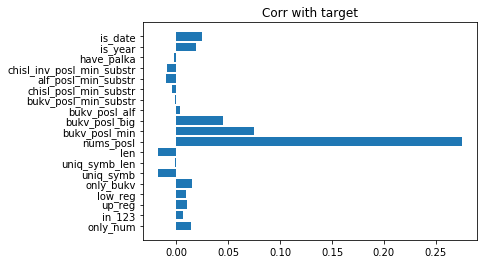

In [159]:
plt.barh(corr_names, width = corr_zn)
plt.title('Corr with target')
plt.show()

In [160]:
import numpy as np
y_train_log = np.log(y_train)
if MODE == 'verif':
    y_test_log = np.log(y_test)

In [161]:
X_train_to_cb = X_train.drop('Password', axis = 1)
X_test_to_cb = X_test.drop('Password', axis = 1)

In [162]:
from catboost import CatBoostRegressor

In [50]:
learning_rate_all = [0.01, 0.05, 0.1, 0.15]

In [53]:
max_sc = 100000
max_zn = -1
all_score_lr = []

for lr in learning_rate_all:
    xgb = CatBoostRegressor(learning_rate= lr, loss_function = 'RMSE', iterations=300).fit(X_train_to_cb, y_train_log)
    pred = xgb.predict(X_test_to_cb)
    sc = np.sqrt(mean_squared_log_error(y_test, np.exp(pred)))
    if sc < max_sc:
        max_sc = sc
        max_zn = lr
    all_score_lr.append(sc)

0:	learn: 0.5464180	total: 310ms	remaining: 1m 32s
1:	learn: 0.5459352	total: 655ms	remaining: 1m 37s
2:	learn: 0.5454615	total: 1.1s	remaining: 1m 49s
3:	learn: 0.5449968	total: 1.54s	remaining: 1m 53s
4:	learn: 0.5445410	total: 1.95s	remaining: 1m 55s
5:	learn: 0.5440939	total: 2.35s	remaining: 1m 55s
6:	learn: 0.5436553	total: 2.73s	remaining: 1m 54s
7:	learn: 0.5432251	total: 3.13s	remaining: 1m 54s
8:	learn: 0.5428031	total: 3.41s	remaining: 1m 50s
9:	learn: 0.5423893	total: 3.81s	remaining: 1m 50s
10:	learn: 0.5419833	total: 4.15s	remaining: 1m 49s
11:	learn: 0.5415851	total: 4.54s	remaining: 1m 48s
12:	learn: 0.5411974	total: 4.98s	remaining: 1m 49s
13:	learn: 0.5408138	total: 5.52s	remaining: 1m 52s
14:	learn: 0.5404375	total: 6.03s	remaining: 1m 54s
15:	learn: 0.5400684	total: 6.46s	remaining: 1m 54s
16:	learn: 0.5397065	total: 6.88s	remaining: 1m 54s
17:	learn: 0.5393525	total: 7.33s	remaining: 1m 54s
18:	learn: 0.5390038	total: 7.74s	remaining: 1m 54s
19:	learn: 0.5386618	to

159:	learn: 0.5214046	total: 1m 1s	remaining: 53.9s
160:	learn: 0.5213608	total: 1m 1s	remaining: 53.5s
161:	learn: 0.5213266	total: 1m 2s	remaining: 53.1s
162:	learn: 0.5212807	total: 1m 2s	remaining: 52.8s
163:	learn: 0.5212469	total: 1m 3s	remaining: 52.4s
164:	learn: 0.5212146	total: 1m 3s	remaining: 52.1s
165:	learn: 0.5211782	total: 1m 4s	remaining: 51.7s
166:	learn: 0.5211448	total: 1m 4s	remaining: 51.3s
167:	learn: 0.5211037	total: 1m 4s	remaining: 50.9s
168:	learn: 0.5210690	total: 1m 5s	remaining: 50.5s
169:	learn: 0.5210304	total: 1m 5s	remaining: 50.1s
170:	learn: 0.5209933	total: 1m 5s	remaining: 49.6s
171:	learn: 0.5209624	total: 1m 6s	remaining: 49.2s
172:	learn: 0.5209372	total: 1m 6s	remaining: 48.9s
173:	learn: 0.5208984	total: 1m 7s	remaining: 48.6s
174:	learn: 0.5208605	total: 1m 7s	remaining: 48.3s
175:	learn: 0.5208255	total: 1m 8s	remaining: 47.9s
176:	learn: 0.5207949	total: 1m 8s	remaining: 47.6s
177:	learn: 0.5207623	total: 1m 8s	remaining: 47.2s
178:	learn: 

16:	learn: 0.5258413	total: 7.06s	remaining: 1m 57s
17:	learn: 0.5253993	total: 7.48s	remaining: 1m 57s
18:	learn: 0.5250022	total: 7.78s	remaining: 1m 55s
19:	learn: 0.5245710	total: 8.18s	remaining: 1m 54s
20:	learn: 0.5242191	total: 8.49s	remaining: 1m 52s
21:	learn: 0.5238255	total: 8.92s	remaining: 1m 52s
22:	learn: 0.5235056	total: 9.23s	remaining: 1m 51s
23:	learn: 0.5232211	total: 9.6s	remaining: 1m 50s
24:	learn: 0.5228840	total: 10.1s	remaining: 1m 51s
25:	learn: 0.5225853	total: 10.6s	remaining: 1m 51s
26:	learn: 0.5223219	total: 11s	remaining: 1m 51s
27:	learn: 0.5220594	total: 11.4s	remaining: 1m 51s
28:	learn: 0.5218385	total: 11.9s	remaining: 1m 50s
29:	learn: 0.5216323	total: 12.3s	remaining: 1m 50s
30:	learn: 0.5214418	total: 12.6s	remaining: 1m 49s
31:	learn: 0.5212472	total: 13s	remaining: 1m 48s
32:	learn: 0.5210523	total: 13.3s	remaining: 1m 47s
33:	learn: 0.5208878	total: 13.6s	remaining: 1m 46s
34:	learn: 0.5206895	total: 14.1s	remaining: 1m 46s
35:	learn: 0.5205

175:	learn: 0.5158490	total: 1m 7s	remaining: 47.9s
176:	learn: 0.5158420	total: 1m 8s	remaining: 47.5s
177:	learn: 0.5158377	total: 1m 8s	remaining: 47.2s
178:	learn: 0.5158164	total: 1m 9s	remaining: 46.7s
179:	learn: 0.5158093	total: 1m 9s	remaining: 46.3s
180:	learn: 0.5157976	total: 1m 9s	remaining: 45.9s
181:	learn: 0.5157889	total: 1m 10s	remaining: 45.5s
182:	learn: 0.5157799	total: 1m 10s	remaining: 45.2s
183:	learn: 0.5157736	total: 1m 10s	remaining: 44.7s
184:	learn: 0.5157656	total: 1m 11s	remaining: 44.4s
185:	learn: 0.5157604	total: 1m 11s	remaining: 44s
186:	learn: 0.5157571	total: 1m 12s	remaining: 43.6s
187:	learn: 0.5157497	total: 1m 12s	remaining: 43.2s
188:	learn: 0.5157314	total: 1m 12s	remaining: 42.8s
189:	learn: 0.5157281	total: 1m 13s	remaining: 42.4s
190:	learn: 0.5157247	total: 1m 13s	remaining: 41.9s
191:	learn: 0.5157190	total: 1m 13s	remaining: 41.5s
192:	learn: 0.5157127	total: 1m 14s	remaining: 41.2s
193:	learn: 0.5157045	total: 1m 14s	remaining: 40.8s
1

32:	learn: 0.5179968	total: 13s	remaining: 1m 45s
33:	learn: 0.5178404	total: 13.3s	remaining: 1m 44s
34:	learn: 0.5177688	total: 13.7s	remaining: 1m 44s
35:	learn: 0.5176533	total: 14.1s	remaining: 1m 43s
36:	learn: 0.5175501	total: 14.5s	remaining: 1m 43s
37:	learn: 0.5174710	total: 14.9s	remaining: 1m 42s
38:	learn: 0.5174189	total: 15.2s	remaining: 1m 41s
39:	learn: 0.5173647	total: 15.4s	remaining: 1m 40s
40:	learn: 0.5173107	total: 15.8s	remaining: 1m 39s
41:	learn: 0.5172556	total: 16.3s	remaining: 1m 40s
42:	learn: 0.5171941	total: 16.7s	remaining: 1m 40s
43:	learn: 0.5171497	total: 17.2s	remaining: 1m 39s
44:	learn: 0.5170936	total: 17.5s	remaining: 1m 39s
45:	learn: 0.5170289	total: 17.9s	remaining: 1m 38s
46:	learn: 0.5169769	total: 18.3s	remaining: 1m 38s
47:	learn: 0.5169069	total: 18.6s	remaining: 1m 37s
48:	learn: 0.5168625	total: 19s	remaining: 1m 37s
49:	learn: 0.5168174	total: 19.4s	remaining: 1m 36s
50:	learn: 0.5167325	total: 19.7s	remaining: 1m 36s
51:	learn: 0.516

191:	learn: 0.5149474	total: 1m 12s	remaining: 41s
192:	learn: 0.5149360	total: 1m 13s	remaining: 40.6s
193:	learn: 0.5149330	total: 1m 13s	remaining: 40.2s
194:	learn: 0.5149292	total: 1m 13s	remaining: 39.8s
195:	learn: 0.5149274	total: 1m 14s	remaining: 39.5s
196:	learn: 0.5149241	total: 1m 14s	remaining: 39.1s
197:	learn: 0.5149162	total: 1m 15s	remaining: 38.7s
198:	learn: 0.5149136	total: 1m 15s	remaining: 38.3s
199:	learn: 0.5149094	total: 1m 15s	remaining: 37.9s
200:	learn: 0.5149039	total: 1m 16s	remaining: 37.5s
201:	learn: 0.5149009	total: 1m 16s	remaining: 37.1s
202:	learn: 0.5148972	total: 1m 16s	remaining: 36.7s
203:	learn: 0.5148935	total: 1m 17s	remaining: 36.3s
204:	learn: 0.5148888	total: 1m 17s	remaining: 35.9s
205:	learn: 0.5148740	total: 1m 17s	remaining: 35.6s
206:	learn: 0.5148700	total: 1m 18s	remaining: 35.2s
207:	learn: 0.5148676	total: 1m 18s	remaining: 34.8s
208:	learn: 0.5148660	total: 1m 19s	remaining: 34.4s
209:	learn: 0.5148598	total: 1m 19s	remaining: 3

48:	learn: 0.5160503	total: 19.2s	remaining: 1m 38s
49:	learn: 0.5160280	total: 19.6s	remaining: 1m 37s
50:	learn: 0.5159914	total: 20s	remaining: 1m 37s
51:	learn: 0.5159110	total: 20.4s	remaining: 1m 37s
52:	learn: 0.5158765	total: 20.8s	remaining: 1m 36s
53:	learn: 0.5158581	total: 21.1s	remaining: 1m 36s
54:	learn: 0.5158334	total: 21.5s	remaining: 1m 35s
55:	learn: 0.5158093	total: 21.8s	remaining: 1m 35s
56:	learn: 0.5157791	total: 22.2s	remaining: 1m 34s
57:	learn: 0.5157624	total: 22.6s	remaining: 1m 34s
58:	learn: 0.5157356	total: 23.2s	remaining: 1m 34s
59:	learn: 0.5157209	total: 23.6s	remaining: 1m 34s
60:	learn: 0.5157083	total: 24s	remaining: 1m 34s
61:	learn: 0.5156839	total: 24.4s	remaining: 1m 33s
62:	learn: 0.5156654	total: 24.8s	remaining: 1m 33s
63:	learn: 0.5156366	total: 25.1s	remaining: 1m 32s
64:	learn: 0.5156241	total: 25.5s	remaining: 1m 32s
65:	learn: 0.5156052	total: 25.8s	remaining: 1m 31s
66:	learn: 0.5155946	total: 26.1s	remaining: 1m 30s
67:	learn: 0.515

206:	learn: 0.5146108	total: 1m 20s	remaining: 36.2s
207:	learn: 0.5146089	total: 1m 21s	remaining: 35.9s
208:	learn: 0.5146062	total: 1m 21s	remaining: 35.5s
209:	learn: 0.5146043	total: 1m 21s	remaining: 35.1s
210:	learn: 0.5146029	total: 1m 22s	remaining: 34.7s
211:	learn: 0.5146025	total: 1m 22s	remaining: 34.3s
212:	learn: 0.5146012	total: 1m 23s	remaining: 33.9s
213:	learn: 0.5145947	total: 1m 23s	remaining: 33.5s
214:	learn: 0.5145929	total: 1m 23s	remaining: 33.1s
215:	learn: 0.5145917	total: 1m 24s	remaining: 32.8s
216:	learn: 0.5145897	total: 1m 24s	remaining: 32.4s
217:	learn: 0.5145886	total: 1m 25s	remaining: 32s
218:	learn: 0.5145868	total: 1m 25s	remaining: 31.6s
219:	learn: 0.5145846	total: 1m 25s	remaining: 31.2s
220:	learn: 0.5145824	total: 1m 26s	remaining: 30.9s
221:	learn: 0.5145810	total: 1m 26s	remaining: 30.5s
222:	learn: 0.5145806	total: 1m 27s	remaining: 30.1s
223:	learn: 0.5145780	total: 1m 27s	remaining: 29.6s
224:	learn: 0.5145746	total: 1m 27s	remaining: 2

In [54]:
l2_leaf_reg_zn = [i for i in range(1,30)]

In [56]:
max_sc_l2 = 100000
max_zn_l2 = -1
all_score_lr_l2 = []

for l2 in l2_leaf_reg_zn:
    xgb = CatBoostRegressor(l2_leaf_reg = l2, learning_rate= max_zn, loss_function = 'RMSE', iterations=300).fit(X_train_to_cb, y_train_log)
    pred = xgb.predict(X_test_to_cb)
    sc = np.sqrt(mean_squared_log_error(y_test, np.exp(pred)))
    if sc < max_sc_l2:
        max_sc_l2 = sc
        max_zn_l2 = lr
    all_score_lr_l2.append(sc)

0:	learn: 0.5400048	total: 419ms	remaining: 2m 5s
1:	learn: 0.5349599	total: 788ms	remaining: 1m 57s
2:	learn: 0.5313916	total: 1.11s	remaining: 1m 50s
3:	learn: 0.5285771	total: 1.41s	remaining: 1m 44s
4:	learn: 0.5266029	total: 1.68s	remaining: 1m 39s
5:	learn: 0.5249425	total: 1.99s	remaining: 1m 37s
6:	learn: 0.5238802	total: 2.28s	remaining: 1m 35s
7:	learn: 0.5228742	total: 2.66s	remaining: 1m 37s
8:	learn: 0.5219771	total: 3.12s	remaining: 1m 40s
9:	learn: 0.5213433	total: 3.45s	remaining: 1m 39s
10:	learn: 0.5206939	total: 3.87s	remaining: 1m 41s
11:	learn: 0.5202003	total: 4.14s	remaining: 1m 39s
12:	learn: 0.5198085	total: 4.56s	remaining: 1m 40s
13:	learn: 0.5195073	total: 4.81s	remaining: 1m 38s
14:	learn: 0.5192242	total: 5.18s	remaining: 1m 38s
15:	learn: 0.5190150	total: 5.57s	remaining: 1m 38s
16:	learn: 0.5187883	total: 5.87s	remaining: 1m 37s
17:	learn: 0.5186012	total: 6.18s	remaining: 1m 36s
18:	learn: 0.5183845	total: 6.47s	remaining: 1m 35s
19:	learn: 0.5182396	to

160:	learn: 0.5147132	total: 46.3s	remaining: 40s
161:	learn: 0.5147081	total: 46.6s	remaining: 39.7s
162:	learn: 0.5147026	total: 46.9s	remaining: 39.4s
163:	learn: 0.5147001	total: 47.2s	remaining: 39.1s
164:	learn: 0.5146969	total: 47.5s	remaining: 38.8s
165:	learn: 0.5146943	total: 47.8s	remaining: 38.5s
166:	learn: 0.5146873	total: 48s	remaining: 38.2s
167:	learn: 0.5146850	total: 48.3s	remaining: 38s
168:	learn: 0.5146839	total: 48.6s	remaining: 37.7s
169:	learn: 0.5146814	total: 48.9s	remaining: 37.4s
170:	learn: 0.5146800	total: 49.2s	remaining: 37.1s
171:	learn: 0.5146785	total: 49.5s	remaining: 36.9s
172:	learn: 0.5146733	total: 49.8s	remaining: 36.6s
173:	learn: 0.5146684	total: 50.1s	remaining: 36.3s
174:	learn: 0.5146663	total: 50.4s	remaining: 36s
175:	learn: 0.5146647	total: 50.7s	remaining: 35.7s
176:	learn: 0.5146625	total: 50.9s	remaining: 35.4s
177:	learn: 0.5146610	total: 51.2s	remaining: 35.1s
178:	learn: 0.5146546	total: 51.5s	remaining: 34.8s
179:	learn: 0.514653

18:	learn: 0.5184722	total: 7.54s	remaining: 1m 51s
19:	learn: 0.5183303	total: 8s	remaining: 1m 51s
20:	learn: 0.5181729	total: 8.3s	remaining: 1m 50s
21:	learn: 0.5180120	total: 8.59s	remaining: 1m 48s
22:	learn: 0.5177892	total: 8.91s	remaining: 1m 47s
23:	learn: 0.5176105	total: 9.38s	remaining: 1m 47s
24:	learn: 0.5174821	total: 9.7s	remaining: 1m 46s
25:	learn: 0.5173768	total: 9.97s	remaining: 1m 45s
26:	learn: 0.5172516	total: 10.2s	remaining: 1m 43s
27:	learn: 0.5171759	total: 10.5s	remaining: 1m 42s
28:	learn: 0.5170894	total: 11s	remaining: 1m 42s
29:	learn: 0.5170462	total: 11.3s	remaining: 1m 41s
30:	learn: 0.5169890	total: 11.5s	remaining: 1m 40s
31:	learn: 0.5169372	total: 11.8s	remaining: 1m 39s
32:	learn: 0.5168437	total: 12.1s	remaining: 1m 38s
33:	learn: 0.5167507	total: 12.5s	remaining: 1m 37s
34:	learn: 0.5166991	total: 12.9s	remaining: 1m 37s
35:	learn: 0.5166278	total: 13.5s	remaining: 1m 38s
36:	learn: 0.5165744	total: 13.9s	remaining: 1m 38s
37:	learn: 0.516507

177:	learn: 0.5147042	total: 1m 4s	remaining: 43.9s
178:	learn: 0.5146983	total: 1m 4s	remaining: 43.5s
179:	learn: 0.5146972	total: 1m 4s	remaining: 43.2s
180:	learn: 0.5146936	total: 1m 5s	remaining: 43s
181:	learn: 0.5146869	total: 1m 5s	remaining: 42.8s
182:	learn: 0.5146845	total: 1m 6s	remaining: 42.5s
183:	learn: 0.5146773	total: 1m 6s	remaining: 42.1s
184:	learn: 0.5146736	total: 1m 7s	remaining: 41.8s
185:	learn: 0.5146703	total: 1m 7s	remaining: 41.4s
186:	learn: 0.5146692	total: 1m 8s	remaining: 41.1s
187:	learn: 0.5146677	total: 1m 8s	remaining: 40.7s
188:	learn: 0.5146611	total: 1m 8s	remaining: 40.4s
189:	learn: 0.5146603	total: 1m 9s	remaining: 40.1s
190:	learn: 0.5146582	total: 1m 9s	remaining: 39.7s
191:	learn: 0.5146540	total: 1m 9s	remaining: 39.4s
192:	learn: 0.5146514	total: 1m 10s	remaining: 39s
193:	learn: 0.5146478	total: 1m 10s	remaining: 38.6s
194:	learn: 0.5146443	total: 1m 10s	remaining: 38.2s
195:	learn: 0.5146433	total: 1m 11s	remaining: 37.9s
196:	learn: 

34:	learn: 0.5167093	total: 13.1s	remaining: 1m 39s
35:	learn: 0.5166370	total: 13.5s	remaining: 1m 39s
36:	learn: 0.5165879	total: 13.8s	remaining: 1m 38s
37:	learn: 0.5165392	total: 14.1s	remaining: 1m 37s
38:	learn: 0.5164822	total: 14.4s	remaining: 1m 36s
39:	learn: 0.5164393	total: 14.8s	remaining: 1m 36s
40:	learn: 0.5163962	total: 15.1s	remaining: 1m 35s
41:	learn: 0.5163545	total: 15.4s	remaining: 1m 34s
42:	learn: 0.5163148	total: 15.7s	remaining: 1m 33s
43:	learn: 0.5162837	total: 16s	remaining: 1m 33s
44:	learn: 0.5162498	total: 16.5s	remaining: 1m 33s
45:	learn: 0.5162235	total: 17s	remaining: 1m 33s
46:	learn: 0.5161472	total: 17.6s	remaining: 1m 34s
47:	learn: 0.5161065	total: 18s	remaining: 1m 34s
48:	learn: 0.5160503	total: 18.4s	remaining: 1m 34s
49:	learn: 0.5160280	total: 18.8s	remaining: 1m 34s
50:	learn: 0.5159914	total: 19.1s	remaining: 1m 33s
51:	learn: 0.5159110	total: 19.5s	remaining: 1m 32s
52:	learn: 0.5158765	total: 19.8s	remaining: 1m 32s
53:	learn: 0.51585

193:	learn: 0.5146379	total: 1m 12s	remaining: 39.8s
194:	learn: 0.5146340	total: 1m 13s	remaining: 39.5s
195:	learn: 0.5146332	total: 1m 13s	remaining: 39s
196:	learn: 0.5146318	total: 1m 13s	remaining: 38.6s
197:	learn: 0.5146305	total: 1m 14s	remaining: 38.2s
198:	learn: 0.5146294	total: 1m 14s	remaining: 37.8s
199:	learn: 0.5146269	total: 1m 14s	remaining: 37.4s
200:	learn: 0.5146239	total: 1m 15s	remaining: 37s
201:	learn: 0.5146210	total: 1m 15s	remaining: 36.6s
202:	learn: 0.5146188	total: 1m 15s	remaining: 36.2s
203:	learn: 0.5146157	total: 1m 16s	remaining: 35.8s
204:	learn: 0.5146130	total: 1m 16s	remaining: 35.4s
205:	learn: 0.5146125	total: 1m 16s	remaining: 34.9s
206:	learn: 0.5146108	total: 1m 17s	remaining: 34.6s
207:	learn: 0.5146089	total: 1m 17s	remaining: 34.2s
208:	learn: 0.5146062	total: 1m 17s	remaining: 33.8s
209:	learn: 0.5146043	total: 1m 17s	remaining: 33.4s
210:	learn: 0.5146029	total: 1m 18s	remaining: 32.9s
211:	learn: 0.5146025	total: 1m 18s	remaining: 32.

50:	learn: 0.5160247	total: 19.8s	remaining: 1m 36s
51:	learn: 0.5159439	total: 20.1s	remaining: 1m 35s
52:	learn: 0.5159084	total: 20.5s	remaining: 1m 35s
53:	learn: 0.5158901	total: 20.7s	remaining: 1m 34s
54:	learn: 0.5158689	total: 21s	remaining: 1m 33s
55:	learn: 0.5158516	total: 21.3s	remaining: 1m 32s
56:	learn: 0.5158354	total: 21.8s	remaining: 1m 32s
57:	learn: 0.5158150	total: 22.1s	remaining: 1m 32s
58:	learn: 0.5157815	total: 22.4s	remaining: 1m 31s
59:	learn: 0.5157628	total: 22.7s	remaining: 1m 30s
60:	learn: 0.5157490	total: 23.2s	remaining: 1m 30s
61:	learn: 0.5157271	total: 23.8s	remaining: 1m 31s
62:	learn: 0.5157088	total: 24.2s	remaining: 1m 31s
63:	learn: 0.5156820	total: 24.7s	remaining: 1m 31s
64:	learn: 0.5156653	total: 25.2s	remaining: 1m 30s
65:	learn: 0.5156229	total: 25.6s	remaining: 1m 30s
66:	learn: 0.5156126	total: 26.1s	remaining: 1m 30s
67:	learn: 0.5156019	total: 26.4s	remaining: 1m 30s
68:	learn: 0.5155862	total: 26.8s	remaining: 1m 29s
69:	learn: 0.5

208:	learn: 0.5146084	total: 1m 21s	remaining: 35.7s
209:	learn: 0.5146076	total: 1m 22s	remaining: 35.3s
210:	learn: 0.5146002	total: 1m 22s	remaining: 35s
211:	learn: 0.5145973	total: 1m 23s	remaining: 34.6s
212:	learn: 0.5145948	total: 1m 23s	remaining: 34.2s
213:	learn: 0.5145932	total: 1m 24s	remaining: 33.8s
214:	learn: 0.5145918	total: 1m 24s	remaining: 33.4s
215:	learn: 0.5145900	total: 1m 24s	remaining: 33s
216:	learn: 0.5145887	total: 1m 25s	remaining: 32.5s
217:	learn: 0.5145855	total: 1m 25s	remaining: 32.2s
218:	learn: 0.5145844	total: 1m 25s	remaining: 31.8s
219:	learn: 0.5145829	total: 1m 26s	remaining: 31.4s
220:	learn: 0.5145788	total: 1m 26s	remaining: 31s
221:	learn: 0.5145766	total: 1m 26s	remaining: 30.6s
222:	learn: 0.5145764	total: 1m 27s	remaining: 30.1s
223:	learn: 0.5145757	total: 1m 27s	remaining: 29.8s
224:	learn: 0.5145752	total: 1m 28s	remaining: 29.3s
225:	learn: 0.5145739	total: 1m 28s	remaining: 28.9s
226:	learn: 0.5145726	total: 1m 28s	remaining: 28.5s

65:	learn: 0.5156153	total: 25.6s	remaining: 1m 30s
66:	learn: 0.5156018	total: 26s	remaining: 1m 30s
67:	learn: 0.5155880	total: 26.3s	remaining: 1m 29s
68:	learn: 0.5155735	total: 26.7s	remaining: 1m 29s
69:	learn: 0.5155665	total: 27s	remaining: 1m 28s
70:	learn: 0.5155513	total: 27.3s	remaining: 1m 28s
71:	learn: 0.5155379	total: 27.7s	remaining: 1m 27s
72:	learn: 0.5155315	total: 28s	remaining: 1m 27s
73:	learn: 0.5155211	total: 28.4s	remaining: 1m 26s
74:	learn: 0.5154937	total: 28.8s	remaining: 1m 26s
75:	learn: 0.5154775	total: 29.2s	remaining: 1m 26s
76:	learn: 0.5154663	total: 29.5s	remaining: 1m 25s
77:	learn: 0.5154611	total: 29.8s	remaining: 1m 24s
78:	learn: 0.5154455	total: 30.3s	remaining: 1m 24s
79:	learn: 0.5154221	total: 30.6s	remaining: 1m 24s
80:	learn: 0.5154106	total: 30.9s	remaining: 1m 23s
81:	learn: 0.5153979	total: 31.2s	remaining: 1m 22s
82:	learn: 0.5153887	total: 31.5s	remaining: 1m 22s
83:	learn: 0.5153662	total: 31.9s	remaining: 1m 22s
84:	learn: 0.51536

223:	learn: 0.5146507	total: 1m 24s	remaining: 28.8s
224:	learn: 0.5146485	total: 1m 25s	remaining: 28.4s
225:	learn: 0.5146462	total: 1m 25s	remaining: 28s
226:	learn: 0.5146449	total: 1m 26s	remaining: 27.7s
227:	learn: 0.5146422	total: 1m 26s	remaining: 27.3s
228:	learn: 0.5146399	total: 1m 26s	remaining: 26.9s
229:	learn: 0.5146369	total: 1m 27s	remaining: 26.5s
230:	learn: 0.5146269	total: 1m 27s	remaining: 26.1s
231:	learn: 0.5146253	total: 1m 27s	remaining: 25.7s
232:	learn: 0.5146247	total: 1m 28s	remaining: 25.3s
233:	learn: 0.5146243	total: 1m 28s	remaining: 25s
234:	learn: 0.5146202	total: 1m 28s	remaining: 24.6s
235:	learn: 0.5146184	total: 1m 29s	remaining: 24.2s
236:	learn: 0.5146179	total: 1m 29s	remaining: 23.8s
237:	learn: 0.5146160	total: 1m 29s	remaining: 23.4s
238:	learn: 0.5146142	total: 1m 30s	remaining: 23.1s
239:	learn: 0.5146136	total: 1m 30s	remaining: 22.7s
240:	learn: 0.5146071	total: 1m 31s	remaining: 22.3s
241:	learn: 0.5146042	total: 1m 31s	remaining: 22s

80:	learn: 0.5154192	total: 29.8s	remaining: 1m 20s
81:	learn: 0.5153997	total: 30.1s	remaining: 1m 20s
82:	learn: 0.5153850	total: 30.6s	remaining: 1m 19s
83:	learn: 0.5153691	total: 31.1s	remaining: 1m 19s
84:	learn: 0.5153681	total: 31.4s	remaining: 1m 19s
85:	learn: 0.5153612	total: 31.8s	remaining: 1m 19s
86:	learn: 0.5153550	total: 32.1s	remaining: 1m 18s
87:	learn: 0.5153347	total: 32.5s	remaining: 1m 18s
88:	learn: 0.5153251	total: 32.8s	remaining: 1m 17s
89:	learn: 0.5153199	total: 33.2s	remaining: 1m 17s
90:	learn: 0.5153024	total: 33.6s	remaining: 1m 17s
91:	learn: 0.5152916	total: 33.9s	remaining: 1m 16s
92:	learn: 0.5152883	total: 34.2s	remaining: 1m 16s
93:	learn: 0.5152660	total: 34.7s	remaining: 1m 16s
94:	learn: 0.5152502	total: 35s	remaining: 1m 15s
95:	learn: 0.5152321	total: 35.3s	remaining: 1m 15s
96:	learn: 0.5152202	total: 35.6s	remaining: 1m 14s
97:	learn: 0.5152078	total: 36s	remaining: 1m 14s
98:	learn: 0.5151952	total: 36.5s	remaining: 1m 14s
99:	learn: 0.515

238:	learn: 0.5145998	total: 1m 27s	remaining: 22.3s
239:	learn: 0.5145984	total: 1m 27s	remaining: 21.9s
240:	learn: 0.5145981	total: 1m 28s	remaining: 21.6s
241:	learn: 0.5145975	total: 1m 28s	remaining: 21.2s
242:	learn: 0.5145954	total: 1m 29s	remaining: 20.9s
243:	learn: 0.5145940	total: 1m 29s	remaining: 20.5s
244:	learn: 0.5145905	total: 1m 29s	remaining: 20.2s
245:	learn: 0.5145893	total: 1m 30s	remaining: 19.8s
246:	learn: 0.5145880	total: 1m 30s	remaining: 19.4s
247:	learn: 0.5145855	total: 1m 30s	remaining: 19.1s
248:	learn: 0.5145828	total: 1m 31s	remaining: 18.7s
249:	learn: 0.5145806	total: 1m 31s	remaining: 18.3s
250:	learn: 0.5145798	total: 1m 31s	remaining: 18s
251:	learn: 0.5145658	total: 1m 32s	remaining: 17.6s
252:	learn: 0.5145627	total: 1m 32s	remaining: 17.2s
253:	learn: 0.5145626	total: 1m 32s	remaining: 16.8s
254:	learn: 0.5145598	total: 1m 33s	remaining: 16.5s
255:	learn: 0.5145555	total: 1m 33s	remaining: 16.1s
256:	learn: 0.5145541	total: 1m 33s	remaining: 1

96:	learn: 0.5152314	total: 37.6s	remaining: 1m 18s
97:	learn: 0.5152222	total: 38s	remaining: 1m 18s
98:	learn: 0.5152168	total: 38.4s	remaining: 1m 17s
99:	learn: 0.5152029	total: 38.7s	remaining: 1m 17s
100:	learn: 0.5151947	total: 39.1s	remaining: 1m 17s
101:	learn: 0.5151808	total: 39.4s	remaining: 1m 16s
102:	learn: 0.5151793	total: 39.8s	remaining: 1m 16s
103:	learn: 0.5151645	total: 40.1s	remaining: 1m 15s
104:	learn: 0.5151599	total: 40.5s	remaining: 1m 15s
105:	learn: 0.5151532	total: 41s	remaining: 1m 14s
106:	learn: 0.5151390	total: 41.3s	remaining: 1m 14s
107:	learn: 0.5151317	total: 41.6s	remaining: 1m 14s
108:	learn: 0.5151215	total: 42.1s	remaining: 1m 13s
109:	learn: 0.5151155	total: 42.3s	remaining: 1m 13s
110:	learn: 0.5151040	total: 42.7s	remaining: 1m 12s
111:	learn: 0.5150962	total: 43.1s	remaining: 1m 12s
112:	learn: 0.5150863	total: 43.7s	remaining: 1m 12s
113:	learn: 0.5150820	total: 44.3s	remaining: 1m 12s
114:	learn: 0.5150809	total: 44.8s	remaining: 1m 12s
1

253:	learn: 0.5145778	total: 1m 37s	remaining: 17.6s
254:	learn: 0.5145750	total: 1m 37s	remaining: 17.2s
255:	learn: 0.5145736	total: 1m 38s	remaining: 16.9s
256:	learn: 0.5145733	total: 1m 38s	remaining: 16.5s
257:	learn: 0.5145724	total: 1m 38s	remaining: 16.1s
258:	learn: 0.5145698	total: 1m 39s	remaining: 15.7s
259:	learn: 0.5145689	total: 1m 39s	remaining: 15.3s
260:	learn: 0.5145674	total: 1m 39s	remaining: 14.9s
261:	learn: 0.5145668	total: 1m 40s	remaining: 14.5s
262:	learn: 0.5145664	total: 1m 40s	remaining: 14.1s
263:	learn: 0.5145656	total: 1m 40s	remaining: 13.7s
264:	learn: 0.5145605	total: 1m 41s	remaining: 13.4s
265:	learn: 0.5145597	total: 1m 41s	remaining: 13s
266:	learn: 0.5145573	total: 1m 42s	remaining: 12.6s
267:	learn: 0.5145569	total: 1m 42s	remaining: 12.3s
268:	learn: 0.5145532	total: 1m 43s	remaining: 11.9s
269:	learn: 0.5145520	total: 1m 43s	remaining: 11.5s
270:	learn: 0.5145515	total: 1m 43s	remaining: 11.1s
271:	learn: 0.5145487	total: 1m 44s	remaining: 1

111:	learn: 0.5151195	total: 42.5s	remaining: 1m 11s
112:	learn: 0.5151044	total: 42.9s	remaining: 1m 10s
113:	learn: 0.5151003	total: 43.3s	remaining: 1m 10s
114:	learn: 0.5150990	total: 43.6s	remaining: 1m 10s
115:	learn: 0.5150940	total: 44s	remaining: 1m 9s
116:	learn: 0.5150832	total: 44.3s	remaining: 1m 9s
117:	learn: 0.5150802	total: 44.8s	remaining: 1m 9s
118:	learn: 0.5150794	total: 45.1s	remaining: 1m 8s
119:	learn: 0.5150732	total: 45.4s	remaining: 1m 8s
120:	learn: 0.5150685	total: 45.8s	remaining: 1m 7s
121:	learn: 0.5150682	total: 46.3s	remaining: 1m 7s
122:	learn: 0.5150601	total: 46.8s	remaining: 1m 7s
123:	learn: 0.5150597	total: 47.3s	remaining: 1m 7s
124:	learn: 0.5150485	total: 47.8s	remaining: 1m 6s
125:	learn: 0.5150381	total: 48.2s	remaining: 1m 6s
126:	learn: 0.5150317	total: 48.7s	remaining: 1m 6s
127:	learn: 0.5150264	total: 49s	remaining: 1m 5s
128:	learn: 0.5150233	total: 49.4s	remaining: 1m 5s
129:	learn: 0.5150161	total: 49.7s	remaining: 1m 4s
130:	learn: 

269:	learn: 0.5145807	total: 1m 41s	remaining: 11.3s
270:	learn: 0.5145801	total: 1m 42s	remaining: 10.9s
271:	learn: 0.5145791	total: 1m 42s	remaining: 10.6s
272:	learn: 0.5145777	total: 1m 42s	remaining: 10.2s
273:	learn: 0.5145775	total: 1m 43s	remaining: 9.79s
274:	learn: 0.5145761	total: 1m 43s	remaining: 9.42s
275:	learn: 0.5145747	total: 1m 43s	remaining: 9.04s
276:	learn: 0.5145739	total: 1m 44s	remaining: 8.68s
277:	learn: 0.5145737	total: 1m 45s	remaining: 8.31s
278:	learn: 0.5145733	total: 1m 45s	remaining: 7.94s
279:	learn: 0.5145721	total: 1m 45s	remaining: 7.57s
280:	learn: 0.5145718	total: 1m 46s	remaining: 7.18s
281:	learn: 0.5145712	total: 1m 46s	remaining: 6.81s
282:	learn: 0.5145704	total: 1m 46s	remaining: 6.42s
283:	learn: 0.5145691	total: 1m 47s	remaining: 6.05s
284:	learn: 0.5145678	total: 1m 47s	remaining: 5.67s
285:	learn: 0.5145671	total: 1m 48s	remaining: 5.3s
286:	learn: 0.5145666	total: 1m 48s	remaining: 4.92s
287:	learn: 0.5145640	total: 1m 48s	remaining: 

127:	learn: 0.5150322	total: 49.8s	remaining: 1m 6s
128:	learn: 0.5150227	total: 50.3s	remaining: 1m 6s
129:	learn: 0.5150146	total: 50.6s	remaining: 1m 6s
130:	learn: 0.5150102	total: 50.9s	remaining: 1m 5s
131:	learn: 0.5150036	total: 51.4s	remaining: 1m 5s
132:	learn: 0.5150019	total: 51.7s	remaining: 1m 4s
133:	learn: 0.5149945	total: 52.1s	remaining: 1m 4s
134:	learn: 0.5149924	total: 52.4s	remaining: 1m 3s
135:	learn: 0.5149841	total: 52.7s	remaining: 1m 3s
136:	learn: 0.5149795	total: 53.1s	remaining: 1m 3s
137:	learn: 0.5149788	total: 53.4s	remaining: 1m 2s
138:	learn: 0.5149677	total: 53.8s	remaining: 1m 2s
139:	learn: 0.5149582	total: 54.1s	remaining: 1m 1s
140:	learn: 0.5149501	total: 54.4s	remaining: 1m 1s
141:	learn: 0.5149472	total: 54.9s	remaining: 1m 1s
142:	learn: 0.5149434	total: 55.2s	remaining: 1m
143:	learn: 0.5149404	total: 55.5s	remaining: 1m
144:	learn: 0.5149358	total: 55.9s	remaining: 59.7s
145:	learn: 0.5149326	total: 56.4s	remaining: 59.5s
146:	learn: 0.5149

284:	learn: 0.5145630	total: 1m 50s	remaining: 5.82s
285:	learn: 0.5145562	total: 1m 50s	remaining: 5.43s
286:	learn: 0.5145556	total: 1m 51s	remaining: 5.04s
287:	learn: 0.5145512	total: 1m 51s	remaining: 4.65s
288:	learn: 0.5145509	total: 1m 51s	remaining: 4.26s
289:	learn: 0.5145506	total: 1m 52s	remaining: 3.87s
290:	learn: 0.5145503	total: 1m 52s	remaining: 3.48s
291:	learn: 0.5145494	total: 1m 52s	remaining: 3.09s
292:	learn: 0.5145483	total: 1m 53s	remaining: 2.71s
293:	learn: 0.5145465	total: 1m 53s	remaining: 2.32s
294:	learn: 0.5145428	total: 1m 54s	remaining: 1.93s
295:	learn: 0.5145419	total: 1m 54s	remaining: 1.55s
296:	learn: 0.5145416	total: 1m 54s	remaining: 1.16s
297:	learn: 0.5145396	total: 1m 55s	remaining: 774ms
298:	learn: 0.5145380	total: 1m 55s	remaining: 387ms
299:	learn: 0.5145368	total: 1m 56s	remaining: 0us
0:	learn: 0.5400075	total: 630ms	remaining: 3m 8s
1:	learn: 0.5349640	total: 1.27s	remaining: 3m 8s
2:	learn: 0.5313960	total: 1.71s	remaining: 2m 49s
3:	

142:	learn: 0.5149242	total: 56s	remaining: 1m 1s
143:	learn: 0.5149205	total: 56.4s	remaining: 1m 1s
144:	learn: 0.5149146	total: 56.9s	remaining: 1m
145:	learn: 0.5149077	total: 57.2s	remaining: 1m
146:	learn: 0.5149039	total: 57.7s	remaining: 1m
147:	learn: 0.5148952	total: 57.9s	remaining: 59.5s
148:	learn: 0.5148900	total: 58.4s	remaining: 59.2s
149:	learn: 0.5148849	total: 58.7s	remaining: 58.7s
150:	learn: 0.5148841	total: 59s	remaining: 58.2s
151:	learn: 0.5148817	total: 59.3s	remaining: 57.7s
152:	learn: 0.5148786	total: 59.8s	remaining: 57.4s
153:	learn: 0.5148770	total: 1m	remaining: 57s
154:	learn: 0.5148741	total: 1m	remaining: 56.5s
155:	learn: 0.5148703	total: 1m	remaining: 56.1s
156:	learn: 0.5148692	total: 1m 1s	remaining: 55.7s
157:	learn: 0.5148644	total: 1m 1s	remaining: 55.2s
158:	learn: 0.5148613	total: 1m 1s	remaining: 54.7s
159:	learn: 0.5148584	total: 1m 2s	remaining: 54.4s
160:	learn: 0.5148577	total: 1m 2s	remaining: 54s
161:	learn: 0.5148529	total: 1m 2s	rem

299:	learn: 0.5145278	total: 1m 55s	remaining: 0us
0:	learn: 0.5400078	total: 444ms	remaining: 2m 12s
1:	learn: 0.5349644	total: 748ms	remaining: 1m 51s
2:	learn: 0.5313965	total: 1.23s	remaining: 2m 1s
3:	learn: 0.5285819	total: 1.58s	remaining: 1m 56s
4:	learn: 0.5266094	total: 1.85s	remaining: 1m 49s
5:	learn: 0.5249485	total: 2.3s	remaining: 1m 52s
6:	learn: 0.5239115	total: 2.62s	remaining: 1m 49s
7:	learn: 0.5230355	total: 2.91s	remaining: 1m 46s
8:	learn: 0.5220305	total: 3.36s	remaining: 1m 48s
9:	learn: 0.5212961	total: 3.68s	remaining: 1m 46s
10:	learn: 0.5207463	total: 4.04s	remaining: 1m 46s
11:	learn: 0.5203167	total: 4.5s	remaining: 1m 47s
12:	learn: 0.5198651	total: 4.97s	remaining: 1m 49s
13:	learn: 0.5195342	total: 5.54s	remaining: 1m 53s
14:	learn: 0.5192485	total: 6.17s	remaining: 1m 57s
15:	learn: 0.5189168	total: 6.54s	remaining: 1m 56s
16:	learn: 0.5186754	total: 7s	remaining: 1m 56s
17:	learn: 0.5184940	total: 7.49s	remaining: 1m 57s
18:	learn: 0.5183432	total: 7

158:	learn: 0.5148661	total: 1m	remaining: 53.7s
159:	learn: 0.5148582	total: 1m 1s	remaining: 53.4s
160:	learn: 0.5148553	total: 1m 1s	remaining: 53s
161:	learn: 0.5148457	total: 1m 1s	remaining: 52.6s
162:	learn: 0.5148426	total: 1m 2s	remaining: 52.2s
163:	learn: 0.5148416	total: 1m 2s	remaining: 51.8s
164:	learn: 0.5148390	total: 1m 2s	remaining: 51.4s
165:	learn: 0.5148320	total: 1m 3s	remaining: 51s
166:	learn: 0.5148273	total: 1m 3s	remaining: 50.6s
167:	learn: 0.5148250	total: 1m 3s	remaining: 50.1s
168:	learn: 0.5148244	total: 1m 4s	remaining: 49.8s
169:	learn: 0.5148234	total: 1m 4s	remaining: 49.4s
170:	learn: 0.5148183	total: 1m 4s	remaining: 48.9s
171:	learn: 0.5148158	total: 1m 5s	remaining: 48.5s
172:	learn: 0.5148088	total: 1m 5s	remaining: 48.2s
173:	learn: 0.5148038	total: 1m 5s	remaining: 47.8s
174:	learn: 0.5148015	total: 1m 6s	remaining: 47.3s
175:	learn: 0.5147992	total: 1m 6s	remaining: 46.9s
176:	learn: 0.5147951	total: 1m 7s	remaining: 46.6s
177:	learn: 0.51479

15:	learn: 0.5189220	total: 5.95s	remaining: 1m 45s
16:	learn: 0.5186817	total: 6.3s	remaining: 1m 44s
17:	learn: 0.5185011	total: 6.79s	remaining: 1m 46s
18:	learn: 0.5183501	total: 7.2s	remaining: 1m 46s
19:	learn: 0.5182263	total: 7.64s	remaining: 1m 46s
20:	learn: 0.5181329	total: 8.06s	remaining: 1m 47s
21:	learn: 0.5180170	total: 8.35s	remaining: 1m 45s
22:	learn: 0.5178919	total: 8.77s	remaining: 1m 45s
23:	learn: 0.5177476	total: 9.08s	remaining: 1m 44s
24:	learn: 0.5176633	total: 9.52s	remaining: 1m 44s
25:	learn: 0.5175379	total: 9.95s	remaining: 1m 44s
26:	learn: 0.5174067	total: 10.4s	remaining: 1m 45s
27:	learn: 0.5173125	total: 10.8s	remaining: 1m 44s
28:	learn: 0.5172244	total: 11.2s	remaining: 1m 44s
29:	learn: 0.5171592	total: 11.5s	remaining: 1m 43s
30:	learn: 0.5171056	total: 11.8s	remaining: 1m 42s
31:	learn: 0.5170589	total: 12.2s	remaining: 1m 42s
32:	learn: 0.5169273	total: 12.6s	remaining: 1m 41s
33:	learn: 0.5168043	total: 12.9s	remaining: 1m 40s
34:	learn: 0.5

173:	learn: 0.5148743	total: 1m 7s	remaining: 49.1s
174:	learn: 0.5148724	total: 1m 8s	remaining: 48.7s
175:	learn: 0.5148676	total: 1m 8s	remaining: 48.3s
176:	learn: 0.5148675	total: 1m 8s	remaining: 47.8s
177:	learn: 0.5148629	total: 1m 9s	remaining: 47.4s
178:	learn: 0.5148550	total: 1m 9s	remaining: 47.1s
179:	learn: 0.5148543	total: 1m 10s	remaining: 46.8s
180:	learn: 0.5148526	total: 1m 10s	remaining: 46.5s
181:	learn: 0.5148455	total: 1m 11s	remaining: 46.1s
182:	learn: 0.5148406	total: 1m 11s	remaining: 45.7s
183:	learn: 0.5148361	total: 1m 11s	remaining: 45.4s
184:	learn: 0.5148287	total: 1m 12s	remaining: 45.1s
185:	learn: 0.5148251	total: 1m 12s	remaining: 44.6s
186:	learn: 0.5148232	total: 1m 13s	remaining: 44.3s
187:	learn: 0.5148230	total: 1m 13s	remaining: 43.8s
188:	learn: 0.5148177	total: 1m 13s	remaining: 43.3s
189:	learn: 0.5148175	total: 1m 14s	remaining: 43s
190:	learn: 0.5148157	total: 1m 14s	remaining: 42.5s
191:	learn: 0.5148136	total: 1m 14s	remaining: 42.1s
1

29:	learn: 0.5171659	total: 11.7s	remaining: 1m 44s
30:	learn: 0.5171209	total: 12.2s	remaining: 1m 46s
31:	learn: 0.5170441	total: 12.7s	remaining: 1m 46s
32:	learn: 0.5169810	total: 13.2s	remaining: 1m 47s
33:	learn: 0.5168888	total: 13.7s	remaining: 1m 46s
34:	learn: 0.5168418	total: 14.2s	remaining: 1m 47s
35:	learn: 0.5167291	total: 14.5s	remaining: 1m 46s
36:	learn: 0.5166921	total: 14.9s	remaining: 1m 45s
37:	learn: 0.5166418	total: 15.2s	remaining: 1m 44s
38:	learn: 0.5166155	total: 15.5s	remaining: 1m 43s
39:	learn: 0.5166002	total: 15.8s	remaining: 1m 42s
40:	learn: 0.5165441	total: 16.2s	remaining: 1m 42s
41:	learn: 0.5165189	total: 16.5s	remaining: 1m 41s
42:	learn: 0.5164773	total: 16.9s	remaining: 1m 41s
43:	learn: 0.5164433	total: 17.2s	remaining: 1m 40s
44:	learn: 0.5164017	total: 17.7s	remaining: 1m 40s
45:	learn: 0.5163770	total: 17.9s	remaining: 1m 39s
46:	learn: 0.5163539	total: 18.2s	remaining: 1m 37s
47:	learn: 0.5162932	total: 18.6s	remaining: 1m 37s
48:	learn: 0

188:	learn: 0.5148611	total: 1m 11s	remaining: 41.7s
189:	learn: 0.5148546	total: 1m 11s	remaining: 41.4s
190:	learn: 0.5148492	total: 1m 11s	remaining: 41s
191:	learn: 0.5148434	total: 1m 12s	remaining: 40.6s
192:	learn: 0.5148405	total: 1m 12s	remaining: 40.2s
193:	learn: 0.5148353	total: 1m 12s	remaining: 39.8s
194:	learn: 0.5148329	total: 1m 13s	remaining: 39.4s
195:	learn: 0.5148282	total: 1m 13s	remaining: 39s
196:	learn: 0.5148276	total: 1m 13s	remaining: 38.7s
197:	learn: 0.5148252	total: 1m 14s	remaining: 38.3s
198:	learn: 0.5148242	total: 1m 14s	remaining: 38s
199:	learn: 0.5148236	total: 1m 15s	remaining: 37.7s
200:	learn: 0.5148214	total: 1m 15s	remaining: 37.3s
201:	learn: 0.5148146	total: 1m 16s	remaining: 37s
202:	learn: 0.5148100	total: 1m 16s	remaining: 36.6s
203:	learn: 0.5148089	total: 1m 17s	remaining: 36.3s
204:	learn: 0.5148071	total: 1m 17s	remaining: 35.9s
205:	learn: 0.5148067	total: 1m 17s	remaining: 35.5s
206:	learn: 0.5148009	total: 1m 18s	remaining: 35.1s
2

45:	learn: 0.5163327	total: 18.5s	remaining: 1m 42s
46:	learn: 0.5162867	total: 18.9s	remaining: 1m 41s
47:	learn: 0.5162431	total: 19.3s	remaining: 1m 41s
48:	learn: 0.5162035	total: 19.7s	remaining: 1m 41s
49:	learn: 0.5161811	total: 20.1s	remaining: 1m 40s
50:	learn: 0.5161534	total: 20.5s	remaining: 1m 39s
51:	learn: 0.5160679	total: 20.7s	remaining: 1m 38s
52:	learn: 0.5160240	total: 21.1s	remaining: 1m 38s
53:	learn: 0.5159747	total: 21.4s	remaining: 1m 37s
54:	learn: 0.5159614	total: 21.8s	remaining: 1m 37s
55:	learn: 0.5159448	total: 22.1s	remaining: 1m 36s
56:	learn: 0.5159304	total: 22.5s	remaining: 1m 35s
57:	learn: 0.5159158	total: 22.8s	remaining: 1m 35s
58:	learn: 0.5158822	total: 23.2s	remaining: 1m 34s
59:	learn: 0.5158647	total: 23.5s	remaining: 1m 34s
60:	learn: 0.5158525	total: 23.9s	remaining: 1m 33s
61:	learn: 0.5158339	total: 24.2s	remaining: 1m 33s
62:	learn: 0.5158054	total: 24.5s	remaining: 1m 32s
63:	learn: 0.5157750	total: 24.9s	remaining: 1m 31s
64:	learn: 0

203:	learn: 0.5147795	total: 1m 17s	remaining: 36.6s
204:	learn: 0.5147766	total: 1m 18s	remaining: 36.2s
205:	learn: 0.5147728	total: 1m 18s	remaining: 35.8s
206:	learn: 0.5147687	total: 1m 18s	remaining: 35.4s
207:	learn: 0.5147682	total: 1m 18s	remaining: 34.9s
208:	learn: 0.5147597	total: 1m 19s	remaining: 34.5s
209:	learn: 0.5147593	total: 1m 19s	remaining: 34.1s
210:	learn: 0.5147575	total: 1m 20s	remaining: 33.8s
211:	learn: 0.5147563	total: 1m 20s	remaining: 33.5s
212:	learn: 0.5147538	total: 1m 21s	remaining: 33.1s
213:	learn: 0.5147504	total: 1m 21s	remaining: 32.7s
214:	learn: 0.5147438	total: 1m 21s	remaining: 32.3s
215:	learn: 0.5147424	total: 1m 22s	remaining: 32s
216:	learn: 0.5147398	total: 1m 22s	remaining: 31.6s
217:	learn: 0.5147385	total: 1m 22s	remaining: 31.2s
218:	learn: 0.5147380	total: 1m 23s	remaining: 30.8s
219:	learn: 0.5147379	total: 1m 23s	remaining: 30.4s
220:	learn: 0.5147362	total: 1m 23s	remaining: 30s
221:	learn: 0.5147361	total: 1m 24s	remaining: 29.

60:	learn: 0.5158806	total: 23s	remaining: 1m 30s
61:	learn: 0.5158583	total: 23.5s	remaining: 1m 30s
62:	learn: 0.5158321	total: 23.9s	remaining: 1m 30s
63:	learn: 0.5158310	total: 24.3s	remaining: 1m 29s
64:	learn: 0.5158083	total: 24.6s	remaining: 1m 29s
65:	learn: 0.5157626	total: 25.1s	remaining: 1m 28s
66:	learn: 0.5157431	total: 25.3s	remaining: 1m 28s
67:	learn: 0.5157292	total: 25.7s	remaining: 1m 27s
68:	learn: 0.5157231	total: 26.1s	remaining: 1m 27s
69:	learn: 0.5157037	total: 26.5s	remaining: 1m 27s
70:	learn: 0.5156916	total: 26.8s	remaining: 1m 26s
71:	learn: 0.5156782	total: 27.2s	remaining: 1m 26s
72:	learn: 0.5156617	total: 27.5s	remaining: 1m 25s
73:	learn: 0.5156411	total: 27.9s	remaining: 1m 25s
74:	learn: 0.5156288	total: 28.3s	remaining: 1m 24s
75:	learn: 0.5156100	total: 28.6s	remaining: 1m 24s
76:	learn: 0.5156025	total: 28.9s	remaining: 1m 23s
77:	learn: 0.5155767	total: 29.4s	remaining: 1m 23s
78:	learn: 0.5155669	total: 29.7s	remaining: 1m 23s
79:	learn: 0.5

218:	learn: 0.5147289	total: 1m 23s	remaining: 30.9s
219:	learn: 0.5147258	total: 1m 23s	remaining: 30.5s
220:	learn: 0.5147233	total: 1m 24s	remaining: 30.1s
221:	learn: 0.5147182	total: 1m 24s	remaining: 29.7s
222:	learn: 0.5147176	total: 1m 24s	remaining: 29.3s
223:	learn: 0.5147173	total: 1m 25s	remaining: 28.8s
224:	learn: 0.5147164	total: 1m 25s	remaining: 28.4s
225:	learn: 0.5147154	total: 1m 25s	remaining: 28.1s
226:	learn: 0.5147108	total: 1m 26s	remaining: 27.7s
227:	learn: 0.5147097	total: 1m 26s	remaining: 27.3s
228:	learn: 0.5147004	total: 1m 26s	remaining: 26.9s
229:	learn: 0.5147001	total: 1m 26s	remaining: 26.5s
230:	learn: 0.5146998	total: 1m 27s	remaining: 26.1s
231:	learn: 0.5146988	total: 1m 27s	remaining: 25.8s
232:	learn: 0.5146946	total: 1m 28s	remaining: 25.4s
233:	learn: 0.5146944	total: 1m 28s	remaining: 25s
234:	learn: 0.5146932	total: 1m 29s	remaining: 24.6s
235:	learn: 0.5146880	total: 1m 29s	remaining: 24.3s
236:	learn: 0.5146876	total: 1m 29s	remaining: 2

75:	learn: 0.5156370	total: 28.3s	remaining: 1m 23s
76:	learn: 0.5156218	total: 28.6s	remaining: 1m 22s
77:	learn: 0.5156085	total: 28.9s	remaining: 1m 22s
78:	learn: 0.5155998	total: 29.5s	remaining: 1m 22s
79:	learn: 0.5155899	total: 29.8s	remaining: 1m 22s
80:	learn: 0.5155782	total: 30.3s	remaining: 1m 21s
81:	learn: 0.5155595	total: 30.8s	remaining: 1m 21s
82:	learn: 0.5155478	total: 31.3s	remaining: 1m 21s
83:	learn: 0.5155429	total: 31.6s	remaining: 1m 21s
84:	learn: 0.5155274	total: 32s	remaining: 1m 20s
85:	learn: 0.5155225	total: 32.3s	remaining: 1m 20s
86:	learn: 0.5155132	total: 32.7s	remaining: 1m 20s
87:	learn: 0.5154985	total: 33s	remaining: 1m 19s
88:	learn: 0.5154874	total: 33.5s	remaining: 1m 19s
89:	learn: 0.5154727	total: 33.8s	remaining: 1m 18s
90:	learn: 0.5154713	total: 34.3s	remaining: 1m 18s
91:	learn: 0.5154709	total: 34.6s	remaining: 1m 18s
92:	learn: 0.5154700	total: 34.8s	remaining: 1m 17s
93:	learn: 0.5154568	total: 35.3s	remaining: 1m 17s
94:	learn: 0.515

233:	learn: 0.5147074	total: 1m 29s	remaining: 25.1s
234:	learn: 0.5147054	total: 1m 29s	remaining: 24.7s
235:	learn: 0.5147022	total: 1m 29s	remaining: 24.3s
236:	learn: 0.5147002	total: 1m 30s	remaining: 24s
237:	learn: 0.5146985	total: 1m 30s	remaining: 23.6s
238:	learn: 0.5146983	total: 1m 31s	remaining: 23.2s
239:	learn: 0.5146979	total: 1m 31s	remaining: 22.9s
240:	learn: 0.5146972	total: 1m 31s	remaining: 22.5s
241:	learn: 0.5146951	total: 1m 32s	remaining: 22.1s
242:	learn: 0.5146947	total: 1m 32s	remaining: 21.7s
243:	learn: 0.5146893	total: 1m 32s	remaining: 21.3s
244:	learn: 0.5146876	total: 1m 33s	remaining: 20.9s
245:	learn: 0.5146858	total: 1m 33s	remaining: 20.6s
246:	learn: 0.5146844	total: 1m 34s	remaining: 20.2s
247:	learn: 0.5146823	total: 1m 34s	remaining: 19.8s
248:	learn: 0.5146809	total: 1m 34s	remaining: 19.4s
249:	learn: 0.5146791	total: 1m 35s	remaining: 19s
250:	learn: 0.5146786	total: 1m 35s	remaining: 18.6s
251:	learn: 0.5146765	total: 1m 35s	remaining: 18.

91:	learn: 0.5154271	total: 36.1s	remaining: 1m 21s
92:	learn: 0.5154138	total: 36.4s	remaining: 1m 21s
93:	learn: 0.5154131	total: 36.8s	remaining: 1m 20s
94:	learn: 0.5153938	total: 37.1s	remaining: 1m 20s
95:	learn: 0.5153924	total: 37.4s	remaining: 1m 19s
96:	learn: 0.5153878	total: 37.7s	remaining: 1m 18s
97:	learn: 0.5153662	total: 38.3s	remaining: 1m 18s
98:	learn: 0.5153609	total: 38.7s	remaining: 1m 18s
99:	learn: 0.5153538	total: 39.2s	remaining: 1m 18s
100:	learn: 0.5153417	total: 39.8s	remaining: 1m 18s
101:	learn: 0.5153338	total: 40.2s	remaining: 1m 18s
102:	learn: 0.5153332	total: 40.5s	remaining: 1m 17s
103:	learn: 0.5153178	total: 40.9s	remaining: 1m 17s
104:	learn: 0.5153170	total: 41.3s	remaining: 1m 16s
105:	learn: 0.5153093	total: 41.6s	remaining: 1m 16s
106:	learn: 0.5152975	total: 42.1s	remaining: 1m 15s
107:	learn: 0.5152908	total: 42.4s	remaining: 1m 15s
108:	learn: 0.5152745	total: 42.9s	remaining: 1m 15s
109:	learn: 0.5152709	total: 43.2s	remaining: 1m 14s
11

248:	learn: 0.5146996	total: 1m 36s	remaining: 19.8s
249:	learn: 0.5146957	total: 1m 36s	remaining: 19.4s
250:	learn: 0.5146946	total: 1m 37s	remaining: 19s
251:	learn: 0.5146919	total: 1m 37s	remaining: 18.6s
252:	learn: 0.5146918	total: 1m 37s	remaining: 18.2s
253:	learn: 0.5146880	total: 1m 38s	remaining: 17.8s
254:	learn: 0.5146859	total: 1m 38s	remaining: 17.4s
255:	learn: 0.5146843	total: 1m 39s	remaining: 17.1s
256:	learn: 0.5146827	total: 1m 39s	remaining: 16.7s
257:	learn: 0.5146810	total: 1m 40s	remaining: 16.3s
258:	learn: 0.5146793	total: 1m 40s	remaining: 15.9s
259:	learn: 0.5146785	total: 1m 40s	remaining: 15.5s
260:	learn: 0.5146765	total: 1m 41s	remaining: 15.1s
261:	learn: 0.5146753	total: 1m 41s	remaining: 14.8s
262:	learn: 0.5146738	total: 1m 41s	remaining: 14.3s
263:	learn: 0.5146732	total: 1m 42s	remaining: 14s
264:	learn: 0.5146717	total: 1m 42s	remaining: 13.6s
265:	learn: 0.5146714	total: 1m 42s	remaining: 13.2s
266:	learn: 0.5146689	total: 1m 43s	remaining: 12.

106:	learn: 0.5153884	total: 41.8s	remaining: 1m 15s
107:	learn: 0.5153881	total: 42.3s	remaining: 1m 15s
108:	learn: 0.5153724	total: 42.8s	remaining: 1m 14s
109:	learn: 0.5153700	total: 43.2s	remaining: 1m 14s
110:	learn: 0.5153567	total: 43.5s	remaining: 1m 14s
111:	learn: 0.5153450	total: 43.9s	remaining: 1m 13s
112:	learn: 0.5153413	total: 44.3s	remaining: 1m 13s
113:	learn: 0.5153350	total: 44.7s	remaining: 1m 12s
114:	learn: 0.5153346	total: 44.9s	remaining: 1m 12s
115:	learn: 0.5153234	total: 45.4s	remaining: 1m 12s
116:	learn: 0.5153196	total: 45.7s	remaining: 1m 11s
117:	learn: 0.5153184	total: 46.1s	remaining: 1m 11s
118:	learn: 0.5152799	total: 46.5s	remaining: 1m 10s
119:	learn: 0.5152712	total: 46.9s	remaining: 1m 10s
120:	learn: 0.5152704	total: 47.2s	remaining: 1m 9s
121:	learn: 0.5152561	total: 47.6s	remaining: 1m 9s
122:	learn: 0.5152430	total: 48.2s	remaining: 1m 9s
123:	learn: 0.5152420	total: 48.8s	remaining: 1m 9s
124:	learn: 0.5152313	total: 49.3s	remaining: 1m 9

263:	learn: 0.5146828	total: 1m 41s	remaining: 13.9s
264:	learn: 0.5146826	total: 1m 42s	remaining: 13.5s
265:	learn: 0.5146779	total: 1m 42s	remaining: 13.1s
266:	learn: 0.5146768	total: 1m 43s	remaining: 12.8s
267:	learn: 0.5146766	total: 1m 43s	remaining: 12.4s
268:	learn: 0.5146763	total: 1m 43s	remaining: 12s
269:	learn: 0.5146669	total: 1m 44s	remaining: 11.6s
270:	learn: 0.5146659	total: 1m 44s	remaining: 11.2s
271:	learn: 0.5146657	total: 1m 45s	remaining: 10.8s
272:	learn: 0.5146652	total: 1m 45s	remaining: 10.4s
273:	learn: 0.5146642	total: 1m 45s	remaining: 10s
274:	learn: 0.5146632	total: 1m 46s	remaining: 9.66s
275:	learn: 0.5146624	total: 1m 46s	remaining: 9.26s
276:	learn: 0.5146622	total: 1m 46s	remaining: 8.87s
277:	learn: 0.5146574	total: 1m 47s	remaining: 8.49s
278:	learn: 0.5146556	total: 1m 47s	remaining: 8.1s
279:	learn: 0.5146539	total: 1m 47s	remaining: 7.71s
280:	learn: 0.5146536	total: 1m 48s	remaining: 7.32s
281:	learn: 0.5146532	total: 1m 48s	remaining: 6.94

121:	learn: 0.5152584	total: 46.1s	remaining: 1m 7s
122:	learn: 0.5152576	total: 46.4s	remaining: 1m 6s
123:	learn: 0.5152479	total: 46.7s	remaining: 1m 6s
124:	learn: 0.5152455	total: 47.1s	remaining: 1m 5s
125:	learn: 0.5152328	total: 47.6s	remaining: 1m 5s
126:	learn: 0.5152185	total: 48.1s	remaining: 1m 5s
127:	learn: 0.5152117	total: 48.6s	remaining: 1m 5s
128:	learn: 0.5152067	total: 49s	remaining: 1m 4s
129:	learn: 0.5152062	total: 49.3s	remaining: 1m 4s
130:	learn: 0.5151969	total: 49.7s	remaining: 1m 4s
131:	learn: 0.5151884	total: 50.1s	remaining: 1m 3s
132:	learn: 0.5151868	total: 50.4s	remaining: 1m 3s
133:	learn: 0.5151791	total: 50.9s	remaining: 1m 3s
134:	learn: 0.5151648	total: 51.3s	remaining: 1m 2s
135:	learn: 0.5151610	total: 51.7s	remaining: 1m 2s
136:	learn: 0.5151604	total: 51.9s	remaining: 1m 1s
137:	learn: 0.5151537	total: 52.4s	remaining: 1m 1s
138:	learn: 0.5151461	total: 52.8s	remaining: 1m 1s
139:	learn: 0.5151417	total: 53.1s	remaining: 1m
140:	learn: 0.515

278:	learn: 0.5146411	total: 1m 46s	remaining: 7.99s
279:	learn: 0.5146405	total: 1m 46s	remaining: 7.61s
280:	learn: 0.5146402	total: 1m 47s	remaining: 7.25s
281:	learn: 0.5146400	total: 1m 47s	remaining: 6.87s
282:	learn: 0.5146396	total: 1m 48s	remaining: 6.49s
283:	learn: 0.5146385	total: 1m 48s	remaining: 6.11s
284:	learn: 0.5146376	total: 1m 48s	remaining: 5.73s
285:	learn: 0.5146375	total: 1m 49s	remaining: 5.35s
286:	learn: 0.5146370	total: 1m 49s	remaining: 4.97s
287:	learn: 0.5146367	total: 1m 50s	remaining: 4.59s
288:	learn: 0.5146355	total: 1m 50s	remaining: 4.21s
289:	learn: 0.5146350	total: 1m 50s	remaining: 3.82s
290:	learn: 0.5146331	total: 1m 51s	remaining: 3.44s
291:	learn: 0.5146326	total: 1m 51s	remaining: 3.05s
292:	learn: 0.5146325	total: 1m 51s	remaining: 2.67s
293:	learn: 0.5146321	total: 1m 52s	remaining: 2.29s
294:	learn: 0.5146318	total: 1m 52s	remaining: 1.91s
295:	learn: 0.5146302	total: 1m 52s	remaining: 1.52s
296:	learn: 0.5146300	total: 1m 53s	remaining:

136:	learn: 0.5151985	total: 54s	remaining: 1m 4s
137:	learn: 0.5151939	total: 54.4s	remaining: 1m 3s
138:	learn: 0.5151814	total: 54.7s	remaining: 1m 3s
139:	learn: 0.5151807	total: 55s	remaining: 1m 2s
140:	learn: 0.5151799	total: 55.6s	remaining: 1m 2s
141:	learn: 0.5151735	total: 56s	remaining: 1m 2s
142:	learn: 0.5151693	total: 56.7s	remaining: 1m 2s
143:	learn: 0.5151638	total: 57s	remaining: 1m 1s
144:	learn: 0.5151573	total: 57.3s	remaining: 1m 1s
145:	learn: 0.5151569	total: 57.8s	remaining: 1m
146:	learn: 0.5151566	total: 58.2s	remaining: 1m
147:	learn: 0.5151563	total: 58.6s	remaining: 1m
148:	learn: 0.5151405	total: 59.1s	remaining: 59.9s
149:	learn: 0.5151371	total: 59.4s	remaining: 59.4s
150:	learn: 0.5151317	total: 59.8s	remaining: 59s
151:	learn: 0.5151244	total: 1m	remaining: 58.5s
152:	learn: 0.5151242	total: 1m	remaining: 58s
153:	learn: 0.5150933	total: 1m	remaining: 57.6s
154:	learn: 0.5150913	total: 1m 1s	remaining: 57.1s
155:	learn: 0.5150910	total: 1m 1s	remaini

293:	learn: 0.5146585	total: 1m 54s	remaining: 2.34s
294:	learn: 0.5146565	total: 1m 55s	remaining: 1.95s
295:	learn: 0.5146564	total: 1m 55s	remaining: 1.56s
296:	learn: 0.5146548	total: 1m 56s	remaining: 1.17s
297:	learn: 0.5146543	total: 1m 56s	remaining: 783ms
298:	learn: 0.5146523	total: 1m 57s	remaining: 391ms
299:	learn: 0.5146497	total: 1m 57s	remaining: 0us
0:	learn: 0.5400109	total: 390ms	remaining: 1m 56s
1:	learn: 0.5349689	total: 810ms	remaining: 2m
2:	learn: 0.5314015	total: 1.13s	remaining: 1m 52s
3:	learn: 0.5285867	total: 1.54s	remaining: 1m 53s
4:	learn: 0.5266159	total: 1.85s	remaining: 1m 49s
5:	learn: 0.5249545	total: 2.36s	remaining: 1m 55s
6:	learn: 0.5238866	total: 2.65s	remaining: 1m 51s
7:	learn: 0.5230466	total: 3.1s	remaining: 1m 53s
8:	learn: 0.5221937	total: 3.39s	remaining: 1m 49s
9:	learn: 0.5215872	total: 3.67s	remaining: 1m 46s
10:	learn: 0.5210197	total: 4.09s	remaining: 1m 47s
11:	learn: 0.5204365	total: 4.36s	remaining: 1m 44s
12:	learn: 0.5199551	t

151:	learn: 0.5150392	total: 57.3s	remaining: 55.8s
152:	learn: 0.5150250	total: 57.6s	remaining: 55.4s
153:	learn: 0.5150214	total: 57.9s	remaining: 54.9s
154:	learn: 0.5150179	total: 58.3s	remaining: 54.5s
155:	learn: 0.5150137	total: 58.6s	remaining: 54.1s
156:	learn: 0.5150094	total: 59.2s	remaining: 53.9s
157:	learn: 0.5150091	total: 59.6s	remaining: 53.6s
158:	learn: 0.5150025	total: 1m	remaining: 53.4s
159:	learn: 0.5149994	total: 1m	remaining: 53.1s
160:	learn: 0.5149990	total: 1m 1s	remaining: 52.7s
161:	learn: 0.5149913	total: 1m 1s	remaining: 52.3s
162:	learn: 0.5149909	total: 1m 1s	remaining: 51.9s
163:	learn: 0.5149863	total: 1m 2s	remaining: 51.6s
164:	learn: 0.5149800	total: 1m 2s	remaining: 51.1s
165:	learn: 0.5149798	total: 1m 2s	remaining: 50.7s
166:	learn: 0.5149770	total: 1m 3s	remaining: 50.3s
167:	learn: 0.5149714	total: 1m 3s	remaining: 49.9s
168:	learn: 0.5149703	total: 1m 3s	remaining: 49.5s
169:	learn: 0.5149631	total: 1m 4s	remaining: 49s
170:	learn: 0.514957

8:	learn: 0.5221967	total: 4.46s	remaining: 2m 24s
9:	learn: 0.5215907	total: 4.93s	remaining: 2m 23s
10:	learn: 0.5210240	total: 5.24s	remaining: 2m 17s
11:	learn: 0.5204407	total: 5.64s	remaining: 2m 15s
12:	learn: 0.5199592	total: 6.11s	remaining: 2m 14s
13:	learn: 0.5196221	total: 6.4s	remaining: 2m 10s
14:	learn: 0.5193768	total: 6.68s	remaining: 2m 6s
15:	learn: 0.5191238	total: 7.11s	remaining: 2m 6s
16:	learn: 0.5188132	total: 7.41s	remaining: 2m 3s
17:	learn: 0.5186316	total: 7.79s	remaining: 2m 2s
18:	learn: 0.5184823	total: 8.08s	remaining: 1m 59s
19:	learn: 0.5183524	total: 8.37s	remaining: 1m 57s
20:	learn: 0.5182472	total: 8.69s	remaining: 1m 55s
21:	learn: 0.5181170	total: 9.11s	remaining: 1m 55s
22:	learn: 0.5179834	total: 9.41s	remaining: 1m 53s
23:	learn: 0.5178145	total: 9.75s	remaining: 1m 52s
24:	learn: 0.5176688	total: 10.3s	remaining: 1m 52s
25:	learn: 0.5175225	total: 10.9s	remaining: 1m 54s
26:	learn: 0.5174437	total: 11.4s	remaining: 1m 54s
27:	learn: 0.517357

167:	learn: 0.5150160	total: 1m 6s	remaining: 51.9s
168:	learn: 0.5150137	total: 1m 6s	remaining: 51.6s
169:	learn: 0.5150098	total: 1m 6s	remaining: 51.2s
170:	learn: 0.5150045	total: 1m 7s	remaining: 50.8s
171:	learn: 0.5149999	total: 1m 7s	remaining: 50.4s
172:	learn: 0.5149943	total: 1m 8s	remaining: 50s
173:	learn: 0.5149919	total: 1m 8s	remaining: 49.5s
174:	learn: 0.5149858	total: 1m 8s	remaining: 49.1s
175:	learn: 0.5149850	total: 1m 9s	remaining: 48.6s
176:	learn: 0.5149795	total: 1m 9s	remaining: 48.3s
177:	learn: 0.5149769	total: 1m 9s	remaining: 47.9s
178:	learn: 0.5149768	total: 1m 10s	remaining: 47.5s
179:	learn: 0.5149742	total: 1m 10s	remaining: 47s
180:	learn: 0.5149681	total: 1m 10s	remaining: 46.6s
181:	learn: 0.5149631	total: 1m 11s	remaining: 46.2s
182:	learn: 0.5149600	total: 1m 11s	remaining: 45.8s
183:	learn: 0.5149481	total: 1m 12s	remaining: 45.5s
184:	learn: 0.5149464	total: 1m 12s	remaining: 45.3s
185:	learn: 0.5149429	total: 1m 13s	remaining: 44.9s
186:	lea

24:	learn: 0.5176752	total: 10.1s	remaining: 1m 51s
25:	learn: 0.5175289	total: 10.7s	remaining: 1m 52s
26:	learn: 0.5174500	total: 11s	remaining: 1m 51s
27:	learn: 0.5173663	total: 11.5s	remaining: 1m 51s
28:	learn: 0.5172717	total: 11.8s	remaining: 1m 50s
29:	learn: 0.5172209	total: 12.3s	remaining: 1m 50s
30:	learn: 0.5171743	total: 12.6s	remaining: 1m 49s
31:	learn: 0.5171426	total: 13s	remaining: 1m 48s
32:	learn: 0.5171227	total: 13.2s	remaining: 1m 47s
33:	learn: 0.5169944	total: 13.7s	remaining: 1m 47s
34:	learn: 0.5169531	total: 14s	remaining: 1m 46s
35:	learn: 0.5168701	total: 14.5s	remaining: 1m 46s
36:	learn: 0.5168114	total: 14.8s	remaining: 1m 45s
37:	learn: 0.5167557	total: 15.1s	remaining: 1m 44s
38:	learn: 0.5167277	total: 15.4s	remaining: 1m 43s
39:	learn: 0.5167047	total: 15.8s	remaining: 1m 42s
40:	learn: 0.5166344	total: 16.4s	remaining: 1m 43s
41:	learn: 0.5166119	total: 16.8s	remaining: 1m 43s
42:	learn: 0.5165258	total: 17.4s	remaining: 1m 44s
43:	learn: 0.51649

183:	learn: 0.5149774	total: 1m 11s	remaining: 45.4s
184:	learn: 0.5149732	total: 1m 12s	remaining: 45s
185:	learn: 0.5149678	total: 1m 12s	remaining: 44.7s
186:	learn: 0.5149646	total: 1m 13s	remaining: 44.3s
187:	learn: 0.5149615	total: 1m 13s	remaining: 44s
188:	learn: 0.5149613	total: 1m 14s	remaining: 43.6s
189:	learn: 0.5149544	total: 1m 14s	remaining: 43.2s
190:	learn: 0.5149542	total: 1m 15s	remaining: 42.8s
191:	learn: 0.5149512	total: 1m 15s	remaining: 42.4s
192:	learn: 0.5149438	total: 1m 15s	remaining: 42s
193:	learn: 0.5149412	total: 1m 16s	remaining: 41.6s
194:	learn: 0.5149411	total: 1m 16s	remaining: 41.2s
195:	learn: 0.5149383	total: 1m 16s	remaining: 40.7s
196:	learn: 0.5149347	total: 1m 17s	remaining: 40.4s
197:	learn: 0.5149324	total: 1m 17s	remaining: 39.9s
198:	learn: 0.5149248	total: 1m 17s	remaining: 39.6s
199:	learn: 0.5149236	total: 1m 18s	remaining: 39.1s
200:	learn: 0.5149171	total: 1m 18s	remaining: 38.7s
201:	learn: 0.5149167	total: 1m 19s	remaining: 38.4s

40:	learn: 0.5166432	total: 16.6s	remaining: 1m 44s
41:	learn: 0.5166209	total: 17s	remaining: 1m 44s
42:	learn: 0.5165213	total: 17.3s	remaining: 1m 43s
43:	learn: 0.5164905	total: 17.7s	remaining: 1m 43s
44:	learn: 0.5164522	total: 18s	remaining: 1m 42s
45:	learn: 0.5164505	total: 18.3s	remaining: 1m 40s
46:	learn: 0.5164105	total: 18.7s	remaining: 1m 40s
47:	learn: 0.5163378	total: 19s	remaining: 1m 39s
48:	learn: 0.5162893	total: 19.3s	remaining: 1m 38s
49:	learn: 0.5162682	total: 19.8s	remaining: 1m 38s
50:	learn: 0.5162320	total: 20.1s	remaining: 1m 37s
51:	learn: 0.5161841	total: 20.4s	remaining: 1m 37s
52:	learn: 0.5161612	total: 20.7s	remaining: 1m 36s
53:	learn: 0.5161428	total: 21.2s	remaining: 1m 36s
54:	learn: 0.5161314	total: 21.5s	remaining: 1m 35s
55:	learn: 0.5161151	total: 21.8s	remaining: 1m 35s
56:	learn: 0.5160835	total: 22.2s	remaining: 1m 34s
57:	learn: 0.5160691	total: 22.8s	remaining: 1m 35s
58:	learn: 0.5160367	total: 23.5s	remaining: 1m 35s
59:	learn: 0.51601

198:	learn: 0.5148846	total: 1m 16s	remaining: 38.9s
199:	learn: 0.5148824	total: 1m 17s	remaining: 38.5s
200:	learn: 0.5148797	total: 1m 17s	remaining: 38.1s
201:	learn: 0.5148792	total: 1m 17s	remaining: 37.8s
202:	learn: 0.5148789	total: 1m 18s	remaining: 37.4s
203:	learn: 0.5148773	total: 1m 18s	remaining: 37s
204:	learn: 0.5148737	total: 1m 19s	remaining: 36.6s
205:	learn: 0.5148618	total: 1m 19s	remaining: 36.2s
206:	learn: 0.5148608	total: 1m 19s	remaining: 35.9s
207:	learn: 0.5148604	total: 1m 20s	remaining: 35.4s
208:	learn: 0.5148597	total: 1m 20s	remaining: 35s
209:	learn: 0.5148535	total: 1m 20s	remaining: 34.6s
210:	learn: 0.5148460	total: 1m 21s	remaining: 34.3s
211:	learn: 0.5148426	total: 1m 21s	remaining: 33.9s
212:	learn: 0.5148426	total: 1m 22s	remaining: 33.5s
213:	learn: 0.5148398	total: 1m 22s	remaining: 33.2s
214:	learn: 0.5148386	total: 1m 23s	remaining: 32.9s
215:	learn: 0.5148362	total: 1m 23s	remaining: 32.5s
216:	learn: 0.5148310	total: 1m 23s	remaining: 32.

55:	learn: 0.5161335	total: 22.5s	remaining: 1m 38s
56:	learn: 0.5161195	total: 23s	remaining: 1m 38s
57:	learn: 0.5161015	total: 23.4s	remaining: 1m 37s
58:	learn: 0.5160674	total: 23.9s	remaining: 1m 37s
59:	learn: 0.5160649	total: 24.1s	remaining: 1m 36s
60:	learn: 0.5160252	total: 24.6s	remaining: 1m 36s
61:	learn: 0.5159927	total: 25s	remaining: 1m 36s
62:	learn: 0.5159715	total: 25.5s	remaining: 1m 35s
63:	learn: 0.5159620	total: 25.8s	remaining: 1m 35s
64:	learn: 0.5159561	total: 26s	remaining: 1m 34s
65:	learn: 0.5159477	total: 26.4s	remaining: 1m 33s
66:	learn: 0.5158979	total: 26.8s	remaining: 1m 33s
67:	learn: 0.5158789	total: 27.2s	remaining: 1m 32s
68:	learn: 0.5158485	total: 27.5s	remaining: 1m 32s
69:	learn: 0.5157896	total: 27.9s	remaining: 1m 31s
70:	learn: 0.5157717	total: 28.3s	remaining: 1m 31s
71:	learn: 0.5157498	total: 28.9s	remaining: 1m 31s
72:	learn: 0.5157494	total: 29.1s	remaining: 1m 30s
73:	learn: 0.5157458	total: 29.6s	remaining: 1m 30s
74:	learn: 0.51573

213:	learn: 0.5148787	total: 1m 25s	remaining: 34.2s
214:	learn: 0.5148761	total: 1m 25s	remaining: 33.8s
215:	learn: 0.5148575	total: 1m 25s	remaining: 33.4s
216:	learn: 0.5148570	total: 1m 26s	remaining: 33s
217:	learn: 0.5148549	total: 1m 26s	remaining: 32.5s
218:	learn: 0.5148548	total: 1m 26s	remaining: 32.1s
219:	learn: 0.5148484	total: 1m 27s	remaining: 31.7s
220:	learn: 0.5148447	total: 1m 27s	remaining: 31.3s
221:	learn: 0.5148418	total: 1m 27s	remaining: 30.9s
222:	learn: 0.5148417	total: 1m 28s	remaining: 30.5s
223:	learn: 0.5148406	total: 1m 28s	remaining: 30s
224:	learn: 0.5148373	total: 1m 29s	remaining: 29.7s
225:	learn: 0.5148340	total: 1m 29s	remaining: 29.4s
226:	learn: 0.5148307	total: 1m 30s	remaining: 29s
227:	learn: 0.5148268	total: 1m 30s	remaining: 28.6s
228:	learn: 0.5148250	total: 1m 31s	remaining: 28.2s
229:	learn: 0.5148217	total: 1m 31s	remaining: 27.8s
230:	learn: 0.5148212	total: 1m 31s	remaining: 27.4s
231:	learn: 0.5148179	total: 1m 32s	remaining: 27s
2

70:	learn: 0.5158939	total: 28.2s	remaining: 1m 30s
71:	learn: 0.5158774	total: 28.5s	remaining: 1m 30s
72:	learn: 0.5158513	total: 28.8s	remaining: 1m 29s
73:	learn: 0.5158235	total: 29.3s	remaining: 1m 29s
74:	learn: 0.5158027	total: 29.9s	remaining: 1m 29s
75:	learn: 0.5157983	total: 30.3s	remaining: 1m 29s
76:	learn: 0.5157944	total: 30.6s	remaining: 1m 28s
77:	learn: 0.5157667	total: 31.1s	remaining: 1m 28s
78:	learn: 0.5157648	total: 31.5s	remaining: 1m 28s
79:	learn: 0.5157377	total: 31.9s	remaining: 1m 27s
80:	learn: 0.5157361	total: 32.3s	remaining: 1m 27s
81:	learn: 0.5157338	total: 32.6s	remaining: 1m 26s
82:	learn: 0.5157191	total: 33s	remaining: 1m 26s
83:	learn: 0.5157162	total: 33.3s	remaining: 1m 25s
84:	learn: 0.5157145	total: 33.6s	remaining: 1m 24s
85:	learn: 0.5156958	total: 34s	remaining: 1m 24s
86:	learn: 0.5156948	total: 34.3s	remaining: 1m 24s
87:	learn: 0.5156874	total: 34.8s	remaining: 1m 23s
88:	learn: 0.5156856	total: 35s	remaining: 1m 23s
89:	learn: 0.51567

228:	learn: 0.5148274	total: 1m 28s	remaining: 27.5s
229:	learn: 0.5148270	total: 1m 29s	remaining: 27.1s
230:	learn: 0.5148230	total: 1m 29s	remaining: 26.7s
231:	learn: 0.5148210	total: 1m 29s	remaining: 26.3s
232:	learn: 0.5148206	total: 1m 30s	remaining: 25.9s
233:	learn: 0.5148176	total: 1m 30s	remaining: 25.5s
234:	learn: 0.5148140	total: 1m 30s	remaining: 25.1s
235:	learn: 0.5148134	total: 1m 31s	remaining: 24.7s
236:	learn: 0.5148131	total: 1m 31s	remaining: 24.3s
237:	learn: 0.5148103	total: 1m 31s	remaining: 23.9s
238:	learn: 0.5148085	total: 1m 32s	remaining: 23.5s
239:	learn: 0.5148063	total: 1m 32s	remaining: 23.1s
240:	learn: 0.5148023	total: 1m 32s	remaining: 22.7s
241:	learn: 0.5148005	total: 1m 32s	remaining: 22.3s
242:	learn: 0.5147967	total: 1m 33s	remaining: 21.9s
243:	learn: 0.5147926	total: 1m 33s	remaining: 21.6s
244:	learn: 0.5147920	total: 1m 34s	remaining: 21.2s
245:	learn: 0.5147910	total: 1m 34s	remaining: 20.8s
246:	learn: 0.5147882	total: 1m 35s	remaining:

85:	learn: 0.5156815	total: 33.6s	remaining: 1m 23s
86:	learn: 0.5156675	total: 34.2s	remaining: 1m 23s
87:	learn: 0.5156561	total: 34.6s	remaining: 1m 23s
88:	learn: 0.5156452	total: 35.2s	remaining: 1m 23s
89:	learn: 0.5156286	total: 35.6s	remaining: 1m 23s
90:	learn: 0.5156278	total: 36s	remaining: 1m 22s
91:	learn: 0.5156256	total: 36.3s	remaining: 1m 22s
92:	learn: 0.5156191	total: 36.8s	remaining: 1m 21s
93:	learn: 0.5156182	total: 37.1s	remaining: 1m 21s
94:	learn: 0.5156141	total: 37.5s	remaining: 1m 21s
95:	learn: 0.5156138	total: 37.8s	remaining: 1m 20s
96:	learn: 0.5156129	total: 38.1s	remaining: 1m 19s
97:	learn: 0.5156050	total: 38.6s	remaining: 1m 19s
98:	learn: 0.5155934	total: 38.8s	remaining: 1m 18s
99:	learn: 0.5155821	total: 39.1s	remaining: 1m 18s
100:	learn: 0.5155814	total: 39.6s	remaining: 1m 17s
101:	learn: 0.5155402	total: 39.9s	remaining: 1m 17s
102:	learn: 0.5155331	total: 40.2s	remaining: 1m 16s
103:	learn: 0.5155073	total: 40.6s	remaining: 1m 16s
104:	learn

242:	learn: 0.5148038	total: 1m 34s	remaining: 22.2s
243:	learn: 0.5148031	total: 1m 35s	remaining: 21.8s
244:	learn: 0.5148024	total: 1m 35s	remaining: 21.4s
245:	learn: 0.5148019	total: 1m 35s	remaining: 21s
246:	learn: 0.5148015	total: 1m 36s	remaining: 20.6s
247:	learn: 0.5147878	total: 1m 36s	remaining: 20.2s
248:	learn: 0.5147878	total: 1m 36s	remaining: 19.8s
249:	learn: 0.5147876	total: 1m 37s	remaining: 19.4s
250:	learn: 0.5147845	total: 1m 37s	remaining: 19s
251:	learn: 0.5147747	total: 1m 37s	remaining: 18.6s
252:	learn: 0.5147738	total: 1m 38s	remaining: 18.2s
253:	learn: 0.5147679	total: 1m 38s	remaining: 17.9s
254:	learn: 0.5147678	total: 1m 39s	remaining: 17.5s
255:	learn: 0.5147670	total: 1m 39s	remaining: 17.1s
256:	learn: 0.5147652	total: 1m 40s	remaining: 16.8s
257:	learn: 0.5147650	total: 1m 40s	remaining: 16.4s
258:	learn: 0.5147608	total: 1m 41s	remaining: 16s
259:	learn: 0.5147590	total: 1m 41s	remaining: 15.6s
260:	learn: 0.5147516	total: 1m 41s	remaining: 15.2s

100:	learn: 0.5155640	total: 39s	remaining: 1m 16s
101:	learn: 0.5155569	total: 39.5s	remaining: 1m 16s
102:	learn: 0.5155564	total: 40s	remaining: 1m 16s
103:	learn: 0.5155332	total: 40.5s	remaining: 1m 16s
104:	learn: 0.5155263	total: 40.9s	remaining: 1m 16s
105:	learn: 0.5155257	total: 41.3s	remaining: 1m 15s
106:	learn: 0.5155153	total: 41.6s	remaining: 1m 15s
107:	learn: 0.5155138	total: 42s	remaining: 1m 14s
108:	learn: 0.5154963	total: 42.3s	remaining: 1m 14s
109:	learn: 0.5154952	total: 42.7s	remaining: 1m 13s
110:	learn: 0.5154828	total: 43s	remaining: 1m 13s
111:	learn: 0.5154672	total: 43.5s	remaining: 1m 13s
112:	learn: 0.5154607	total: 44s	remaining: 1m 12s
113:	learn: 0.5154595	total: 44.3s	remaining: 1m 12s
114:	learn: 0.5154432	total: 44.7s	remaining: 1m 11s
115:	learn: 0.5154426	total: 45s	remaining: 1m 11s
116:	learn: 0.5154214	total: 45.3s	remaining: 1m 10s
117:	learn: 0.5153963	total: 45.7s	remaining: 1m 10s
118:	learn: 0.5153867	total: 46.1s	remaining: 1m 10s
119:	

257:	learn: 0.5148047	total: 1m 38s	remaining: 16.1s
258:	learn: 0.5148010	total: 1m 39s	remaining: 15.7s
259:	learn: 0.5147969	total: 1m 39s	remaining: 15.3s
260:	learn: 0.5147963	total: 1m 39s	remaining: 14.9s
261:	learn: 0.5147960	total: 1m 40s	remaining: 14.5s
262:	learn: 0.5147959	total: 1m 40s	remaining: 14.1s
263:	learn: 0.5147957	total: 1m 40s	remaining: 13.7s
264:	learn: 0.5147876	total: 1m 41s	remaining: 13.4s
265:	learn: 0.5147874	total: 1m 41s	remaining: 13s
266:	learn: 0.5147852	total: 1m 41s	remaining: 12.6s
267:	learn: 0.5147824	total: 1m 42s	remaining: 12.2s
268:	learn: 0.5147811	total: 1m 42s	remaining: 11.8s
269:	learn: 0.5147809	total: 1m 42s	remaining: 11.4s
270:	learn: 0.5147730	total: 1m 43s	remaining: 11.1s
271:	learn: 0.5147718	total: 1m 43s	remaining: 10.7s
272:	learn: 0.5147702	total: 1m 44s	remaining: 10.3s
273:	learn: 0.5147685	total: 1m 44s	remaining: 9.95s
274:	learn: 0.5147664	total: 1m 45s	remaining: 9.56s
275:	learn: 0.5147663	total: 1m 45s	remaining: 9

115:	learn: 0.5153828	total: 46s	remaining: 1m 12s
116:	learn: 0.5153697	total: 46.6s	remaining: 1m 12s
117:	learn: 0.5153693	total: 47s	remaining: 1m 12s
118:	learn: 0.5153584	total: 47.5s	remaining: 1m 12s
119:	learn: 0.5153502	total: 47.9s	remaining: 1m 11s
120:	learn: 0.5153223	total: 48.4s	remaining: 1m 11s
121:	learn: 0.5153215	total: 48.8s	remaining: 1m 11s
122:	learn: 0.5153084	total: 49.2s	remaining: 1m 10s
123:	learn: 0.5153028	total: 49.6s	remaining: 1m 10s
124:	learn: 0.5152981	total: 49.9s	remaining: 1m 9s
125:	learn: 0.5152862	total: 50.4s	remaining: 1m 9s
126:	learn: 0.5152605	total: 50.7s	remaining: 1m 9s
127:	learn: 0.5152598	total: 51s	remaining: 1m 8s
128:	learn: 0.5152595	total: 51.5s	remaining: 1m 8s
129:	learn: 0.5152500	total: 51.7s	remaining: 1m 7s
130:	learn: 0.5152374	total: 52s	remaining: 1m 7s
131:	learn: 0.5152370	total: 52.4s	remaining: 1m 6s
132:	learn: 0.5152333	total: 52.8s	remaining: 1m 6s
133:	learn: 0.5152188	total: 53.1s	remaining: 1m 5s
134:	learn:

272:	learn: 0.5147194	total: 1m 46s	remaining: 10.5s
273:	learn: 0.5147150	total: 1m 46s	remaining: 10.1s
274:	learn: 0.5147149	total: 1m 47s	remaining: 9.74s
275:	learn: 0.5147133	total: 1m 47s	remaining: 9.36s
276:	learn: 0.5147129	total: 1m 48s	remaining: 8.97s
277:	learn: 0.5147119	total: 1m 48s	remaining: 8.57s
278:	learn: 0.5147117	total: 1m 48s	remaining: 8.18s
279:	learn: 0.5147112	total: 1m 49s	remaining: 7.79s
280:	learn: 0.5147110	total: 1m 49s	remaining: 7.4s
281:	learn: 0.5147107	total: 1m 49s	remaining: 7.01s
282:	learn: 0.5147090	total: 1m 50s	remaining: 6.62s
283:	learn: 0.5147072	total: 1m 50s	remaining: 6.23s
284:	learn: 0.5147071	total: 1m 50s	remaining: 5.84s
285:	learn: 0.5147052	total: 1m 51s	remaining: 5.45s
286:	learn: 0.5147049	total: 1m 51s	remaining: 5.05s
287:	learn: 0.5147036	total: 1m 52s	remaining: 4.68s
288:	learn: 0.5147032	total: 1m 52s	remaining: 4.29s
289:	learn: 0.5147016	total: 1m 53s	remaining: 3.9s
290:	learn: 0.5147010	total: 1m 53s	remaining: 3

Text(0.5, 1.0, 'L2')

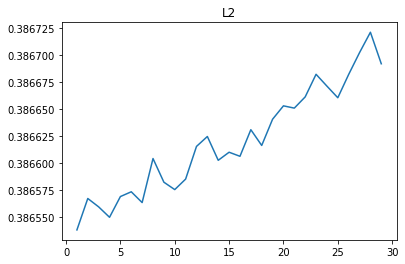

In [60]:
plt.plot(l2_leaf_reg_zn, all_score_lr_l2)
plt.title("L2")

Text(0.5, 1.0, 'LR')

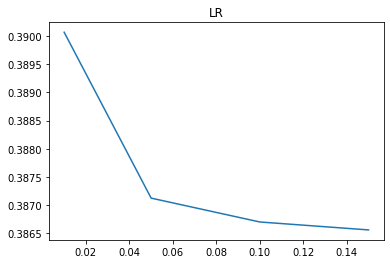

In [62]:
plt.plot(learning_rate_all, all_score_lr)
plt.title('LR')

In [163]:
xgb = CatBoostRegressor(l2_leaf_reg = 0.1, learning_rate= 0.5, loss_function = 'RMSE').fit(X_train_to_cb, y_train_log)
pred = xgb.predict(X_test_to_cb)
#sc = np.sqrt(mean_squared_log_error(y_test, np.exp(pred)))
sc

0:	learn: 0.5172778	total: 385ms	remaining: 6m 24s
1:	learn: 0.5092006	total: 714ms	remaining: 5m 56s
2:	learn: 0.5060909	total: 1.1s	remaining: 6m 4s
3:	learn: 0.5043971	total: 1.45s	remaining: 6m 2s
4:	learn: 0.5035321	total: 1.8s	remaining: 5m 59s
5:	learn: 0.5030271	total: 2.17s	remaining: 5m 59s
6:	learn: 0.5023389	total: 2.52s	remaining: 5m 57s
7:	learn: 0.5019352	total: 2.85s	remaining: 5m 53s
8:	learn: 0.5016991	total: 3.24s	remaining: 5m 57s
9:	learn: 0.5014361	total: 3.6s	remaining: 5m 56s
10:	learn: 0.5012046	total: 4s	remaining: 5m 59s
11:	learn: 0.5009906	total: 4.41s	remaining: 6m 3s
12:	learn: 0.5009003	total: 4.73s	remaining: 5m 58s
13:	learn: 0.5008221	total: 5.04s	remaining: 5m 55s
14:	learn: 0.5006929	total: 5.44s	remaining: 5m 57s
15:	learn: 0.5006054	total: 5.78s	remaining: 5m 55s
16:	learn: 0.5004851	total: 6.1s	remaining: 5m 52s
17:	learn: 0.5004227	total: 6.41s	remaining: 5m 49s
18:	learn: 0.5003623	total: 6.79s	remaining: 5m 50s
19:	learn: 0.5003324	total: 7.13

159:	learn: 0.4984919	total: 55s	remaining: 4m 48s
160:	learn: 0.4984914	total: 55.3s	remaining: 4m 48s
161:	learn: 0.4984882	total: 55.9s	remaining: 4m 49s
162:	learn: 0.4984876	total: 56.2s	remaining: 4m 48s
163:	learn: 0.4984873	total: 56.5s	remaining: 4m 48s
164:	learn: 0.4984825	total: 56.9s	remaining: 4m 47s
165:	learn: 0.4984798	total: 57.3s	remaining: 4m 47s
166:	learn: 0.4984780	total: 57.7s	remaining: 4m 47s
167:	learn: 0.4984728	total: 58s	remaining: 4m 47s
168:	learn: 0.4984715	total: 58.3s	remaining: 4m 46s
169:	learn: 0.4984711	total: 58.7s	remaining: 4m 46s
170:	learn: 0.4984702	total: 59.1s	remaining: 4m 46s
171:	learn: 0.4984698	total: 59.5s	remaining: 4m 46s
172:	learn: 0.4984665	total: 59.8s	remaining: 4m 46s
173:	learn: 0.4984657	total: 1m	remaining: 4m 45s
174:	learn: 0.4984623	total: 1m	remaining: 4m 45s
175:	learn: 0.4984591	total: 1m	remaining: 4m 45s
176:	learn: 0.4984583	total: 1m 1s	remaining: 4m 44s
177:	learn: 0.4984520	total: 1m 1s	remaining: 4m 44s
178:	l

313:	learn: 0.4982867	total: 1m 47s	remaining: 3m 54s
314:	learn: 0.4982860	total: 1m 47s	remaining: 3m 54s
315:	learn: 0.4982853	total: 1m 48s	remaining: 3m 53s
316:	learn: 0.4982848	total: 1m 48s	remaining: 3m 53s
317:	learn: 0.4982838	total: 1m 48s	remaining: 3m 53s
318:	learn: 0.4982838	total: 1m 49s	remaining: 3m 53s
319:	learn: 0.4982809	total: 1m 49s	remaining: 3m 52s
320:	learn: 0.4982809	total: 1m 49s	remaining: 3m 52s
321:	learn: 0.4982809	total: 1m 50s	remaining: 3m 51s
322:	learn: 0.4982807	total: 1m 50s	remaining: 3m 51s
323:	learn: 0.4982806	total: 1m 50s	remaining: 3m 51s
324:	learn: 0.4982805	total: 1m 51s	remaining: 3m 50s
325:	learn: 0.4982789	total: 1m 51s	remaining: 3m 50s
326:	learn: 0.4982775	total: 1m 51s	remaining: 3m 49s
327:	learn: 0.4982773	total: 1m 51s	remaining: 3m 49s
328:	learn: 0.4982772	total: 1m 52s	remaining: 3m 48s
329:	learn: 0.4982743	total: 1m 52s	remaining: 3m 48s
330:	learn: 0.4982688	total: 1m 52s	remaining: 3m 48s
331:	learn: 0.4982675	total:

466:	learn: 0.4981883	total: 2m 38s	remaining: 3m 1s
467:	learn: 0.4981864	total: 2m 39s	remaining: 3m
468:	learn: 0.4981862	total: 2m 39s	remaining: 3m
469:	learn: 0.4981858	total: 2m 39s	remaining: 3m
470:	learn: 0.4981856	total: 2m 39s	remaining: 2m 59s
471:	learn: 0.4981856	total: 2m 40s	remaining: 2m 59s
472:	learn: 0.4981847	total: 2m 40s	remaining: 2m 59s
473:	learn: 0.4981845	total: 2m 40s	remaining: 2m 58s
474:	learn: 0.4981842	total: 2m 41s	remaining: 2m 58s
475:	learn: 0.4981841	total: 2m 41s	remaining: 2m 57s
476:	learn: 0.4981841	total: 2m 41s	remaining: 2m 57s
477:	learn: 0.4981839	total: 2m 42s	remaining: 2m 57s
478:	learn: 0.4981835	total: 2m 42s	remaining: 2m 56s
479:	learn: 0.4981834	total: 2m 42s	remaining: 2m 56s
480:	learn: 0.4981824	total: 2m 43s	remaining: 2m 56s
481:	learn: 0.4981819	total: 2m 43s	remaining: 2m 55s
482:	learn: 0.4981806	total: 2m 43s	remaining: 2m 55s
483:	learn: 0.4981806	total: 2m 44s	remaining: 2m 55s
484:	learn: 0.4981800	total: 2m 44s	remai

619:	learn: 0.4981373	total: 3m 30s	remaining: 2m 8s
620:	learn: 0.4981369	total: 3m 30s	remaining: 2m 8s
621:	learn: 0.4981369	total: 3m 30s	remaining: 2m 7s
622:	learn: 0.4981368	total: 3m 30s	remaining: 2m 7s
623:	learn: 0.4981365	total: 3m 31s	remaining: 2m 7s
624:	learn: 0.4981365	total: 3m 31s	remaining: 2m 6s
625:	learn: 0.4981355	total: 3m 31s	remaining: 2m 6s
626:	learn: 0.4981348	total: 3m 32s	remaining: 2m 6s
627:	learn: 0.4981340	total: 3m 32s	remaining: 2m 5s
628:	learn: 0.4981338	total: 3m 32s	remaining: 2m 5s
629:	learn: 0.4981337	total: 3m 33s	remaining: 2m 5s
630:	learn: 0.4981336	total: 3m 33s	remaining: 2m 4s
631:	learn: 0.4981334	total: 3m 34s	remaining: 2m 4s
632:	learn: 0.4981333	total: 3m 34s	remaining: 2m 4s
633:	learn: 0.4981332	total: 3m 34s	remaining: 2m 3s
634:	learn: 0.4981321	total: 3m 35s	remaining: 2m 3s
635:	learn: 0.4981311	total: 3m 35s	remaining: 2m 3s
636:	learn: 0.4981311	total: 3m 35s	remaining: 2m 2s
637:	learn: 0.4981307	total: 3m 36s	remaining:

773:	learn: 0.4980958	total: 4m 21s	remaining: 1m 16s
774:	learn: 0.4980952	total: 4m 21s	remaining: 1m 15s
775:	learn: 0.4980949	total: 4m 21s	remaining: 1m 15s
776:	learn: 0.4980949	total: 4m 22s	remaining: 1m 15s
777:	learn: 0.4980948	total: 4m 22s	remaining: 1m 14s
778:	learn: 0.4980948	total: 4m 22s	remaining: 1m 14s
779:	learn: 0.4980934	total: 4m 23s	remaining: 1m 14s
780:	learn: 0.4980934	total: 4m 23s	remaining: 1m 13s
781:	learn: 0.4980933	total: 4m 23s	remaining: 1m 13s
782:	learn: 0.4980933	total: 4m 24s	remaining: 1m 13s
783:	learn: 0.4980932	total: 4m 24s	remaining: 1m 12s
784:	learn: 0.4980932	total: 4m 24s	remaining: 1m 12s
785:	learn: 0.4980932	total: 4m 25s	remaining: 1m 12s
786:	learn: 0.4980932	total: 4m 25s	remaining: 1m 11s
787:	learn: 0.4980931	total: 4m 25s	remaining: 1m 11s
788:	learn: 0.4980931	total: 4m 26s	remaining: 1m 11s
789:	learn: 0.4980931	total: 4m 26s	remaining: 1m 10s
790:	learn: 0.4980928	total: 4m 27s	remaining: 1m 10s
791:	learn: 0.4980924	total:

929:	learn: 0.4980628	total: 5m 12s	remaining: 23.5s
930:	learn: 0.4980628	total: 5m 13s	remaining: 23.2s
931:	learn: 0.4980627	total: 5m 13s	remaining: 22.9s
932:	learn: 0.4980627	total: 5m 13s	remaining: 22.5s
933:	learn: 0.4980627	total: 5m 14s	remaining: 22.2s
934:	learn: 0.4980627	total: 5m 14s	remaining: 21.9s
935:	learn: 0.4980624	total: 5m 14s	remaining: 21.5s
936:	learn: 0.4980624	total: 5m 15s	remaining: 21.2s
937:	learn: 0.4980624	total: 5m 15s	remaining: 20.9s
938:	learn: 0.4980622	total: 5m 15s	remaining: 20.5s
939:	learn: 0.4980620	total: 5m 16s	remaining: 20.2s
940:	learn: 0.4980620	total: 5m 16s	remaining: 19.8s
941:	learn: 0.4980617	total: 5m 16s	remaining: 19.5s
942:	learn: 0.4980617	total: 5m 17s	remaining: 19.2s
943:	learn: 0.4980617	total: 5m 17s	remaining: 18.8s
944:	learn: 0.4980616	total: 5m 17s	remaining: 18.5s
945:	learn: 0.4980616	total: 5m 18s	remaining: 18.2s
946:	learn: 0.4980616	total: 5m 18s	remaining: 17.8s
947:	learn: 0.4980616	total: 5m 18s	remaining:

0.3738075706113156

In [112]:
res_dataframe = pd.DataFrame()
res_dataframe['Password'] = X_test['Password']
res_dataframe['y_test'] = y_test
res_dataframe['pred'] = np.exp(pred)
res_dataframe['err'] = res_dataframe['pred'] - res_dataframe['y_test']

In [114]:
res_dataframe.sort_values(by = 'err')[res_dataframe.sort_values(by = 'err')['err'] < -100].to_csv('/data/rvasilye/reseults_err.csv', index = None)

In [ ]:
res_dataframe

In [283]:
pred = xgb.predict(X_test_to_cb)

In [164]:
X_test['Times'] = np.exp(pred)

In [166]:
X_test[['Id', 'Times']].to_csv('/data/rvasilye/res_cb_tuned.csv', index = None)

In [51]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, np.exp(pred)))

NameError: name 'pred' is not defined

In [223]:
from sklearn.linear_model import LinearRegression

In [224]:
regr = LinearRegression().fit(X_train_to_cb, y_train_log)

In [225]:
pred_lr = regr.predict(X_test_to_cb)

0.39791332532733514